<h2 style="text-align:center;">E-Portfolio on the UK Road Safety Dataset: Group Assignment</h2>

![Understanding Traffic Awareness and Road Safety](Road%20Safety.PNG)


#### Candidate Numbers: 141715, 835522, 750476, 788719

#### Table of Contents

1. [Importing Libraries and Preparing Environment](#1---Importing-Libraries-and-Preparing-Environment)
2. [Business Objective](#2---Business-Objective)
3. [Data Preparation](#3---Data-Preparation)
4. [Data Splitting](#4---Data-Splitting)
5. [Exploratory Data Analysis](#5---Exploratory-Data-Analysis)
6. [Data Preprocessing](#6---Data-Preprocessing)
7. [Conclusion](#7---Conclusion)
8. [Data Exporting](#9---Data-Exporting)

# Importing Libraries and Preparing Environment

In [2]:
#Base Libraries
import numpy as np
import pandas as pd
import warnings
from scipy import stats
from timeit import default_timer as timer
from datetime import timedelta

#Library for Plotting
import seaborn as sns
import matplotlib.pyplot as plt

#Library for Data Preprocessing and Cleaning
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest

#Prevent warnings of the code from showing
warnings.filterwarnings(action = 'ignore')

# Context and Project Objective

In 2023, approximately 23,000 road collisions occurred across London boroughs; while most caused only minor injuries, around 3,500 involved burns or fractures, and 101 resulted in at least one fatality (Trust For London, 2025). Four datasets from the Department for Transport were merged, cleaned, and split into training and testing sets. Irrelevant variables were removed, and the data underwent imputation, log transformation, and outlier detection.

This project aims to build a machine learning model to predict the severity of traffic accidents using variables related to driver behavior, vehicle type, and environmental conditions. The model will support Lambeth, Wandsworth, Croydon, Westminster & Southwark boroughs to enhance road safety through targeted interventions and awareness campaigns.

# Data Preparation

## Loading Data 

In [7]:
#Load in the datasets
vehicle_data = pd.read_csv('dft-road-casualty-statistics-vehicle-2023.csv')
casualty_data = pd.read_csv('dft-road-casualty-statistics-casualty-2023.csv')
collision_data = pd.read_csv('dft-road-casualty-statistics-collision-2023.csv')
guide_data = pd.read_excel('dft-road-casualty-statistics-road-safety-open-dataset-data-guide-2024.xlsx')

In [8]:
#Verify the data is loaded in correctly
vehicle_data.head()

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver,escooter_flag,dir_from_e,dir_from_n,dir_to_e,dir_to_n,driver_distance_banding
0,2023010419171,2023,10419171,1,11,0,4,1,5,0,...,ALEXANDER DENNIS MODEL MISSING,3,1,E01001177,0,NaN,NaN,NaN,NaN,2
1,2023010419183,2023,10419183,1,11,0,18,5,1,0,...,WRIGHTBUS GEMINI,6,1,E01001419,0,NaN,NaN,NaN,NaN,2
2,2023010419183,2023,10419183,2,9,0,9,1,6,0,...,TOYOTA YARIS,3,1,E01001546,0,NaN,NaN,NaN,NaN,1
3,2023010419183,2023,10419183,3,9,0,8,7,1,0,...,BMW 2 SERIES,4,1,E01001686,0,NaN,NaN,NaN,NaN,4
4,2023010419189,2023,10419189,1,9,0,18,7,3,0,...,LEXUS RX 400,5,1,E01002443,0,NaN,NaN,NaN,NaN,1


In [9]:
#Verify the total number of samples and features of the data
vehicle_data.shape

(189815, 34)

In [10]:
#Check the information of the dataset
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189815 entries, 0 to 189814
Data columns (total 34 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   accident_index                    189815 non-null  object 
 1   accident_year                     189815 non-null  int64  
 2   accident_reference                189815 non-null  object 
 3   vehicle_reference                 189815 non-null  int64  
 4   vehicle_type                      189815 non-null  int64  
 5   towing_and_articulation           189815 non-null  int64  
 6   vehicle_manoeuvre                 189815 non-null  int64  
 7   vehicle_direction_from            189815 non-null  int64  
 8   vehicle_direction_to              189815 non-null  int64  
 9   vehicle_location_restricted_lane  189815 non-null  int64  
 10  junction_location                 189815 non-null  int64  
 11  skidding_and_overturning          189815 non-null  i

In [11]:
#Verify the data is loaded in correctly
casualty_data.head()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,...,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty,enhanced_casualty_severity,casualty_distance_banding
0,2023010419171,2023,10419171,1,1,3,2,20,4,3,...,1,0,0,0,0,1,10,E01030370,-1,3
1,2023010419183,2023,10419183,2,1,1,1,25,5,3,...,0,0,0,0,9,1,3,E01001546,-1,1
2,2023010419183,2023,10419183,3,2,2,2,38,7,3,...,0,2,0,0,9,-1,-1,-1,-1,-1
3,2023010419189,2023,10419189,1,1,1,1,50,8,3,...,0,0,0,0,9,1,5,E01002443,-1,1
4,2023010419191,2023,10419191,2,1,1,1,34,6,3,...,0,0,0,0,1,1,2,E01004679,-1,2


In [12]:
#Verify the total number of samples and features of the data
casualty_data.shape

(132977, 21)

In [13]:
#Check the information of the dataset
casualty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132977 entries, 0 to 132976
Data columns (total 21 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   accident_index                      132977 non-null  object
 1   accident_year                       132977 non-null  int64 
 2   accident_reference                  132977 non-null  object
 3   vehicle_reference                   132977 non-null  int64 
 4   casualty_reference                  132977 non-null  int64 
 5   casualty_class                      132977 non-null  int64 
 6   sex_of_casualty                     132977 non-null  int64 
 7   age_of_casualty                     132977 non-null  int64 
 8   age_band_of_casualty                132977 non-null  int64 
 9   casualty_severity                   132977 non-null  int64 
 10  pedestrian_location                 132977 non-null  int64 
 11  pedestrian_movement                 132

In [14]:
#Verify the data is loaded in correctly
collision_data.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
0,2023010419171,2023,10419171,525060.0,170416.0,-0.202878,51.418974,1,3,1,...,4,8,2,0,0,1,1,2,E01003383,-1
1,2023010419183,2023,10419183,535463.0,198745.0,-0.042464,51.671155,1,3,3,...,4,1,1,0,0,1,1,2,E01001547,-1
2,2023010419189,2023,10419189,508702.0,177696.0,-0.435789,51.487777,1,3,2,...,4,1,1,0,0,1,1,2,E01002448,-1
3,2023010419191,2023,10419191,520341.0,190175.0,-0.263972,51.597575,1,3,2,...,4,9,1,0,0,1,1,2,E01000129,-1
4,2023010419192,2023,10419192,527255.0,176963.0,-0.168976,51.477324,1,3,2,...,4,1,1,0,0,1,1,2,E01004583,-1


In [15]:
#Verify the total number of samples and features of the data
collision_data.shape

(104258, 37)

In [16]:
#Check the information of the dataset
collision_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104258 entries, 0 to 104257
Data columns (total 37 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               104258 non-null  object 
 1   accident_year                                104258 non-null  int64  
 2   accident_reference                           104258 non-null  object 
 3   location_easting_osgr                        104246 non-null  float64
 4   location_northing_osgr                       104246 non-null  float64
 5   longitude                                    104246 non-null  float64
 6   latitude                                     104246 non-null  float64
 7   police_force                                 104258 non-null  int64  
 8   accident_severity                            104258 non-null  int64  
 9   number_of_vehicles                           104258 non-nul

## Merging the Three Datasets

In [18]:
#The three datasets were merged using accident_index, with the unique value for each accident acting as the key.
#Merge the Casualty and the Vehicle dataset first 
accident_1 = pd.merge(casualty_data, vehicle_data, on = 'accident_index', how='inner')

#Merge the result with the Collision dataset:
accident = pd.merge(accident_1, collision_data, on = 'accident_index', how='inner')
accident.head()

,accident_index,accident_year_x,accident_reference_x,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
0,2023010419171,2023,10419171,1,1,3,2,20,4,3,...,4,8,2,0,0,1,1,2,E01003383,-1
1,2023010419183,2023,10419183,2,1,1,1,25,5,3,...,4,1,1,0,0,1,1,2,E01001547,-1
2,2023010419183,2023,10419183,2,1,1,1,25,5,3,...,4,1,1,0,0,1,1,2,E01001547,-1
3,2023010419183,2023,10419183,2,1,1,1,25,5,3,...,4,1,1,0,0,1,1,2,E01001547,-1
4,2023010419183,2023,10419183,3,2,2,2,38,7,3,...,4,1,1,0,0,1,1,2,E01001547,-1


In [19]:
#Check the information of the new merged dataset
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161607 entries, 0 to 161606
Data columns (total 90 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               161607 non-null  object 
 1   accident_year_x                              161607 non-null  int64  
 2   accident_reference_x                         161607 non-null  object 
 3   vehicle_reference_x                          161607 non-null  int64  
 4   casualty_reference                           161607 non-null  int64  
 5   casualty_class                               161607 non-null  int64  
 6   sex_of_casualty                              161607 non-null  int64  
 7   age_of_casualty                              161607 non-null  int64  
 8   age_band_of_casualty                         161607 non-null  int64  
 9   casualty_severity                            161607 non-nul

## Dropping Columns

In [21]:
#Examine the available columns that can be dropped
accident.columns

Index(['accident_index', 'accident_year_x', 'accident_reference_x',
       'vehicle_reference_x', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty',
       'enhanced_casualty_severity', 'casualty_distance_banding',
       'accident_year_y', 'accident_reference_y', 'vehicle_reference_y',
       'vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       '

In [22]:
#Columns were dropped based on whether the target variable accident severity were influenced by them or not.
#The columns below were the ones that were picked.
main_accident = accident.loc[:, ['accident_index', 'time', 'number_of_vehicles', 
                                 'number_of_casualties', 'date', 'local_authority_ons_district', 
                                 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 
                                 'light_conditions','weather_conditions', 'road_surface_conditions', 
                                 'urban_or_rural_area','vehicle_location_restricted_lane', 'junction_location',
                                 'skidding_and_overturning', 'hit_object_in_carriageway', 
                                 'vehicle_leaving_carriageway', 'hit_object_off_carriageway', 'first_point_of_impact', 
                                 'journey_purpose_of_driver', 'sex_of_driver','age_of_driver',
                                 'vehicle_type', 'vehicle_manoeuvre', 'casualty_type', 
                                 'accident_severity']]

In [23]:
#Verify that the columns were kept
main_accident.columns

Index(['accident_index', 'time', 'number_of_vehicles', 'number_of_casualties',
       'date', 'local_authority_ons_district', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'urban_or_rural_area',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'journey_purpose_of_driver', 'sex_of_driver',
       'age_of_driver', 'vehicle_type', 'vehicle_manoeuvre', 'casualty_type',
       'accident_severity'],
      dtype='object')

## Variable Description
 
Variables are categorised into 3 main types:
 
- **Numeric**: Variables containing numeric values.  
- **Categorical**: Variables containing text data / each unique value indicates a category.  
- **Date/Time**: Variables containing date or time values, like accident date or timestamp.
 
 
| **No.** | **Input data**                           | **Definition**                                                        | **Category**   |
|---------|------------------------------------------|----------------------------------------------------------------------|----------------|
| 1       | accident_index                       | Unique reference for the accident                                    | Categorical        |
| 2       | number_of_vehicles                       | Number of vehicles involved in the accident                          | Numeric        |
| 3       | number_of_casualties                     | Number of casualties in the accident                                 | Numeric        |
| 4       | date                                     | Date of the accident (in Date/Time format)                           | Date/Time      |
| 5       | local_authority_ons_district             | Local authority districts where the accident occurred using codes from Office for National Statistics (ONS)                                                                                                            | Categorical    |
| 6       | road_type                                | Type of road where the accident occurred                             | Categorical    |
| 7       | speed_limit                              | Speed limit on the road at the accident location                     | Numeric        |
| 8       | junction_detail                          | Details about the junction at the accident location                  | Categorical    |
| 9       | junction_control                         | Type of control at the junction      | Categorical    |
| 10      | light_conditions                         | Light conditions at the time of the accident                         | Categorical    |
| 11      | weather_conditions                       | Weather conditions during the accident                               | Categorical    |
| 12      | road_surface_conditions                  | Road surface conditions at the accident location                     | Categorical    |
| 13      | urban_or_rural_area                      | Whether the accident occurred in an urban or rural area              | Categorical    |
| 14      | vehicle_location_restricted_lane         | Whether the vehicle was in a restricted lane at the time of the accident | Categorical    |
| 15      | junction_location                        | Location of the junction where the accident occurred                 | Categorical    |
| 16      | skidding_and_overturning                 | Whether the vehicle skidded or overturned during the accident        | Categorical        |
| 17      | hit_object_in_carriageway                | Whether the vehicle hit an object in the carriageway                 | Categorical        |
| 18      | vehicle_leaving_carriageway              | Whether the vehicle left the carriageway during the accident        | Categorical        |
| 19      | hit_object_off_carriageway               | Whether the vehicle hit an object off the carriageway                | Categorical        |
| 20      | first_point_of_impact                    | First point of impact in the accident      | Categorical    |
| 21      | journey_purpose_of_driver                | Purpose of the driver's journey at the time of the accident         | Categorical    |
| 22      | sex_of_driver                            | Gender of the driver involved in the accident                       | Categorical    |
| 23      | age_of_driver                            | Age of the driver at the time of the accident                       | Numeric        |
| 24      | vehicle_type                             | Type of vehicle involved in the accident                            | Categorical    |
| 25      | vehicle_manoeuvre                        | Manoeuvre the vehicle was performing at the time of the accident    | Categorical    |
| 26      | casualty_type                            | Type of casualty                       | Categorical    |
| 27      | accident_severity                        | Severity of the casualty                                             | Categorical   |

In [25]:
#Filter the main_accident dataset to only include accidents occurred in London

#These are rows that the local_authority_ons_district column starts with the prefix 'E09'
main_accident_filtered = main_accident[main_accident['local_authority_ons_district'].str.startswith('E09', na=False)]

In [26]:
#Verify the samples and features of the dataset after the filtering
main_accident_filtered.shape

(48149, 28)

In [27]:
#Drop duplicates
main_accident_filtered.drop_duplicates(keep = 'first', inplace = True)

In [28]:
#Verify the samples and features of the dataset after dropping duplicates
main_accident_filtered.shape

(42129, 28)

In [29]:
#Check example samples
main_accident_filtered.head()

,accident_index,time,number_of_vehicles,number_of_casualties,date,local_authority_ons_district,road_type,speed_limit,junction_detail,junction_control,...,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_of_driver,vehicle_type,vehicle_manoeuvre,casualty_type,accident_severity
0,2023010419171,01:24,1,1,01/01/2023,E09000024,2,20,9,4,...,0,0,1,1,1,61,11,4,0,3
1,2023010419183,02:25,3,2,01/01/2023,E09000010,6,30,3,4,...,0,0,1,1,1,54,11,18,9,3
2,2023010419183,02:25,3,2,01/01/2023,E09000010,6,30,3,4,...,0,0,4,6,1,25,9,9,9,3
3,2023010419183,02:25,3,2,01/01/2023,E09000010,6,30,3,4,...,0,0,1,6,1,42,9,8,9,3
7,2023010419189,03:50,2,1,01/01/2023,E09000017,1,30,1,4,...,0,0,4,6,1,50,9,18,9,3


In [30]:
#Count the number of accidents in each London district
main_accident_filtered['local_authority_ons_district'].value_counts()

local_authority_ons_district
E09000033    2223
E09000008    2080
E09000032    1963
E09000022    1908
E09000028    1889
E09000010    1881
E09000030    1868
E09000014    1797
E09000005    1663
E09000009    1579
E09000003    1565
E09000025    1475
E09000023    1464
E09000012    1397
E09000007    1290
E09000018    1251
E09000017    1189
E09000020    1178
E09000026    1164
E09000011    1132
E09000006    1131
E09000013    1115
E09000019    1065
E09000031     941
E09000016     936
E09000002     837
E09000024     823
E09000004     743
E09000015     723
E09000029     683
E09000027     668
E09000021     508
Name: count, dtype: int64

In [31]:
#Top 5 boroughs with the highest number of accidents are:
boroughs = ['E09000033', 'E09000008', 'E09000032', 'E09000022', 'E09000028']

#Filter the 'main_accident_filtered' dataframe to include only rows for these top 5 boroughs
top_5_boroughs = main_accident_filtered.loc[main_accident_filtered['local_authority_ons_district'].isin(boroughs)]

#Display the summary information about the filtered dataframe
top_5_boroughs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10063 entries, 11 to 48187
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   accident_index                    10063 non-null  object
 1   time                              10063 non-null  object
 2   number_of_vehicles                10063 non-null  int64 
 3   number_of_casualties              10063 non-null  int64 
 4   date                              10063 non-null  object
 5   local_authority_ons_district      10063 non-null  object
 6   road_type                         10063 non-null  int64 
 7   speed_limit                       10063 non-null  int64 
 8   junction_detail                   10063 non-null  int64 
 9   junction_control                  10063 non-null  int64 
 10  light_conditions                  10063 non-null  int64 
 11  weather_conditions                10063 non-null  int64 
 12  road_surface_condition

In [32]:
#Convert the object type of the date and time columns into a datetime type.
top_5_boroughs["date"] = pd.to_datetime(top_5_boroughs["date"], format="%d/%m/%Y")
top_5_boroughs["time"] = pd.to_datetime(top_5_boroughs["time"], format="%H:%M")

#Check to see if the changes were made
print(top_5_boroughs.dtypes)

accident_index                              object
time                                datetime64[ns]
number_of_vehicles                           int64
number_of_casualties                         int64
date                                datetime64[ns]
local_authority_ons_district                object
road_type                                    int64
speed_limit                                  int64
junction_detail                              int64
junction_control                             int64
light_conditions                             int64
weather_conditions                           int64
road_surface_conditions                      int64
urban_or_rural_area                          int64
vehicle_location_restricted_lane             int64
junction_location                            int64
skidding_and_overturning                     int64
hit_object_in_carriageway                    int64
vehicle_leaving_carriageway                  int64
hit_object_off_carriageway     

In [33]:
#Split the original dataframe into two different dataframes
#The X dataframe has all the variables except the target variable
X = top_5_boroughs.loc[:,[col for col in top_5_boroughs.columns if col != 'accident_severity']]

#The y dataframe contains the target variable
y = top_5_boroughs.loc[:,'accident_severity']

In [34]:
#Check the shape of the two dataframes
print(X.shape)
print(y.shape)

(10063, 27)
(10063,)


In [35]:
#Check for any missing values in both the X and y dataframes. -1 is a stand-in value to represent missing values.

search_value = -1

#Search for any -1 value
X_columns_with_value = X.columns[(X == search_value).any(axis=0)]
has_negative_one = (y == -1).any().any()
 
#Print the values
print(f"The following columns in the X dataframe have -1 values: \n{X_columns_with_value}\n")
print(f"There are -1 values in the y dataframe: {has_negative_one}")

The following columns in the X dataframe have -1 values: 
Index(['junction_control', 'age_of_driver'], dtype='object')

There are -1 values in the y dataframe: False


In [36]:
#Change all the -1 values into nan values to show that they represent missing values
X = X.replace(-1, np.nan)

#Check if the changes were implemented
X.isnull().sum()

accident_index                         0
time                                   0
number_of_vehicles                     0
number_of_casualties                   0
date                                   0
local_authority_ons_district           0
road_type                              0
speed_limit                            0
junction_detail                        0
junction_control                    1718
light_conditions                       0
weather_conditions                     0
road_surface_conditions                0
urban_or_rural_area                    0
vehicle_location_restricted_lane       0
junction_location                      0
skidding_and_overturning               0
hit_object_in_carriageway              0
vehicle_leaving_carriageway            0
hit_object_off_carriageway             0
first_point_of_impact                  0
journey_purpose_of_driver              0
sex_of_driver                          0
age_of_driver                       2492
vehicle_type    

# Data Splitting
## Class Distribution of Target Variable 

Split the X and Y datasets into training and test sets. The y_train and y_test sets only have the target variable.

In [39]:
#Calculate percentage proportions
percentage_proportions = top_5_boroughs['accident_severity'].value_counts(normalize=True) * 100
#Format each value in the Series using lamda
formatted_percentages = percentage_proportions.apply(lambda x: f'{x:.2f}%')
print(formatted_percentages)

accident_severity
3    84.11%
2    15.62%
1     0.27%
Name: proportion, dtype: object


<Axes: xlabel='accident_severity'>

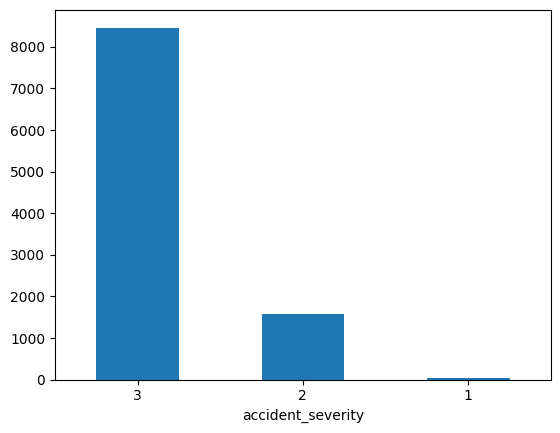

In [40]:
#Highlight the number of counts for each level of severity in the target variable
top_5_boroughs["accident_severity"].value_counts().plot(kind="bar", rot=0)

As a result of the uneven distribution of the classes within the target variable using stratifiedshufflesplit, this is because using random sampling may introduce a bias into the proportion.

In [42]:
#Split the data from the two dataframes into smaller subsets; there should be a training set and a testing set for each of the two dataframes.
#Reset indices in case the two dataframes are not aligned.
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

#The test set should be 20% of the total dataset while the training set should be 80%.
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=7)
train_index, test_index = next(stratified_splitter.split(X, y))

#Apply indices to both X and y
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]


#Show the shape of the four dataframes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8050, 27)
(2013, 27)
(8050,)
(2013,)


In [43]:
#Create a function that measures the proportions of an accident's severity
def accident_severity_proportions(data):
    target = data["accident_severity"] if isinstance(data, pd.DataFrame) else data
    return target.value_counts() / len(data)

#Create a random split
rand_train_set, rand_test_set = train_test_split(top_5_boroughs, test_size=0.2, random_state=7)

#Create a temporary dataframe for easy visualization
df_tmp = pd.DataFrame({
    "Overall": accident_severity_proportions(top_5_boroughs),
    "Random test set": accident_severity_proportions(rand_test_set),
    "Stratified test set": accident_severity_proportions(y_test),
}).sort_index()

#Add two columns for the percent of the difference to the overall proportion
df_tmp["Rand. %error"] = 100 * df_tmp["Random test set"] / df_tmp["Overall"] - 100
df_tmp["Strat. %error"] = 100 * df_tmp["Stratified test set"] / df_tmp["Overall"] - 100

#Visualize table
df_tmp

,Overall,Random test set,Stratified test set,Rand. %error,Strat. %error
accident_severity,,,,,
1,0.002683,0.001987,0.002484,-25.940645,-7.425806
2,0.156216,0.156483,0.156483,0.170931,0.170931
3,0.841101,0.841530,0.841033,0.051004,-0.008058


# Exploratory Data Analysis

Exploratory data analysis on the training set includes descriptive statistics and visualisations for numerical and categorical predictors to identify distributions, outliers, and value counts.

## Univariate Analysis

### Target Variable

In [48]:
#Check the target variables training dataset
y_train.head()

2142    3
1930    3
8757    3
9327    3
7125    2
Name: accident_severity, dtype: int64

In [49]:
#Descriptive Statistics of the Target Variable

#Frequency counts
frequency_counts = pd.DataFrame(y_train.value_counts().sort_index())
 
#Mode
mode_value = y_train.mode()[0]

#Median
median_value = y_train.median()
 
#Percentiles (25th, 50th, 75th)
percentiles = pd.DataFrame(y_train.quantile([0.25, 0.5, 0.75]))
 
#Summary
print("Frequency Counts:\n", frequency_counts)
print("\nMode:", mode_value)
print("Median:", median_value)
print("\nPercentiles (25th, 50th, 75th):\n", percentiles)

Frequency Counts:
                    count
accident_severity       
1                     22
2                   1257
3                   6771

Mode: 3
Median: 3.0

Percentiles (25th, 50th, 75th):
       accident_severity
0.25                3.0
0.50                3.0
0.75                3.0


The mode of the accident severity is 3, which means that most of the accidents had a slight severity, backed up by the frequencies of the accident severity and the percentile table indicates that 75% of the accidents have a severity rating of slight.

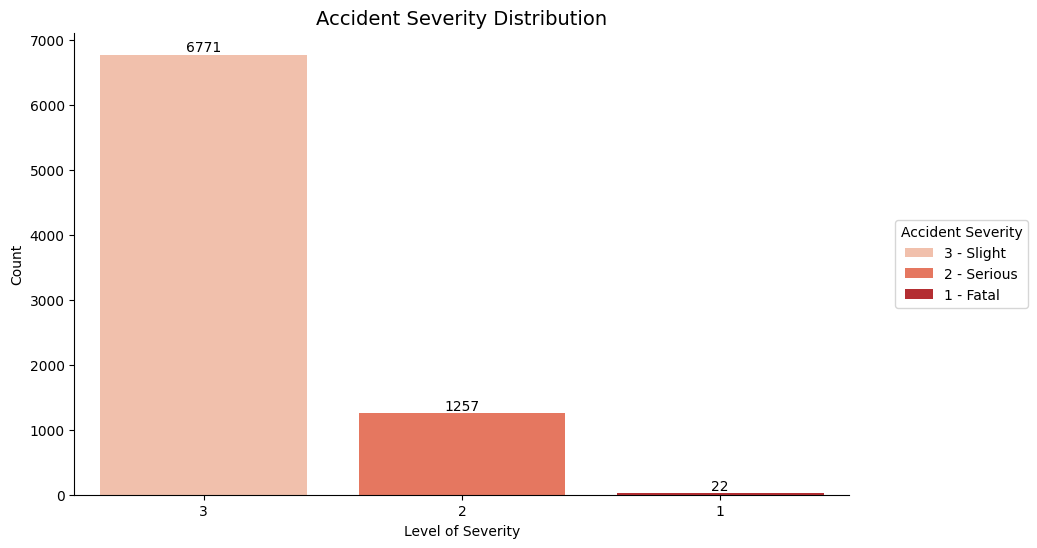

In [51]:
#Set the size of the figure
plt.figure(figsize=(10, 6))

#Visualise the distribution of the target variables
ax = sns.countplot(x=y_train, order=y.value_counts().index, palette='Reds')

#Add counts on bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)  

#Label the plot and create a legend
plt.title('Accident Severity Distribution', fontsize=14)
plt.legend(title='Accident Severity', labels=['3 - Slight', '2 - Serious', '1 - Fatal'], bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.xlabel('Level of Severity')
plt.ylabel('Count')
plt.xticks(ha='center')

#Cleaner borders
sns.despine()  

#Display the plot
plt.show()

The data suggests that while fatal accidents are the least frequent, there is a significant number of slight accidents, indicating a need for targeted safety interventions to reduce overall accident rates.

### Predictor Variables

#### Numerical Variables

In [55]:
#There are four numerical predictor variables: Number of vehicles, number of casualties, the speed limit, and the age of the drivers.
#Descriptive statistics
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

def iqr(x):
    return q3(x) - q1(x)

def get_mode(x):
    return x.mode().iloc[0]

#Calculate statistics with proper naming
stats = X_train[['number_of_vehicles', 'number_of_casualties', 'speed_limit', 'age_of_driver']].agg([
    'min',
    'max',
    q1,
    'median',
    q3,
    iqr,
    get_mode
]).rename(index={
    'q1': '25%',
    'median': '50%',
    'q3': '75%',
    'iqr': 'IQR',
    'get_mode': 'mode'
})

#Format and transpose results
stats_df = stats.transpose().reset_index().rename(columns={'index': 'variable'})
stats_df = stats_df[['variable', 'min', '25%', '50%', '75%', 'max', 'IQR', 'mode']]
stats_df = stats_df.set_index('variable')

print("Descriptive Statistics:")
display(stats_df)

Descriptive Statistics:


,min,25%,50%,75%,max,IQR,mode
variable,,,,,,,
number_of_vehicles,1.0,2.0,2.0,2.0,17.0,0.0,2.0
number_of_casualties,1.0,1.0,1.0,1.0,7.0,0.0,1.0
speed_limit,20.0,20.0,20.0,30.0,60.0,10.0,20.0
age_of_driver,8.0,28.0,36.0,48.0,93.0,20.0,33.0


#### number_of_vehicles
- As indicated in the table above and the plot below the highest number of vehicles involved in a single accident was 17.
- 75% of accidents consisted of 2 or less vehicles. 

#### number_of_casualties
- The highest number of casualties in an accident was 7, however this is an outlier because the majority of accidents only had 1 casualty.
- The percentile ranges for casualties are 1, suggesting that most accidents involved only one individual facing harm.

#### speed_limit
- For the speed limit, the 25th and 50th percentiles are 20, while the 75th percentile is 30, suggesting that 75% of the speed limits are 30 or below.

#### age_of_driver
- Most drivers involved in the accidents were around 30.
- The maximum age of a driver in an accident was 93, while the minimum age was 5.

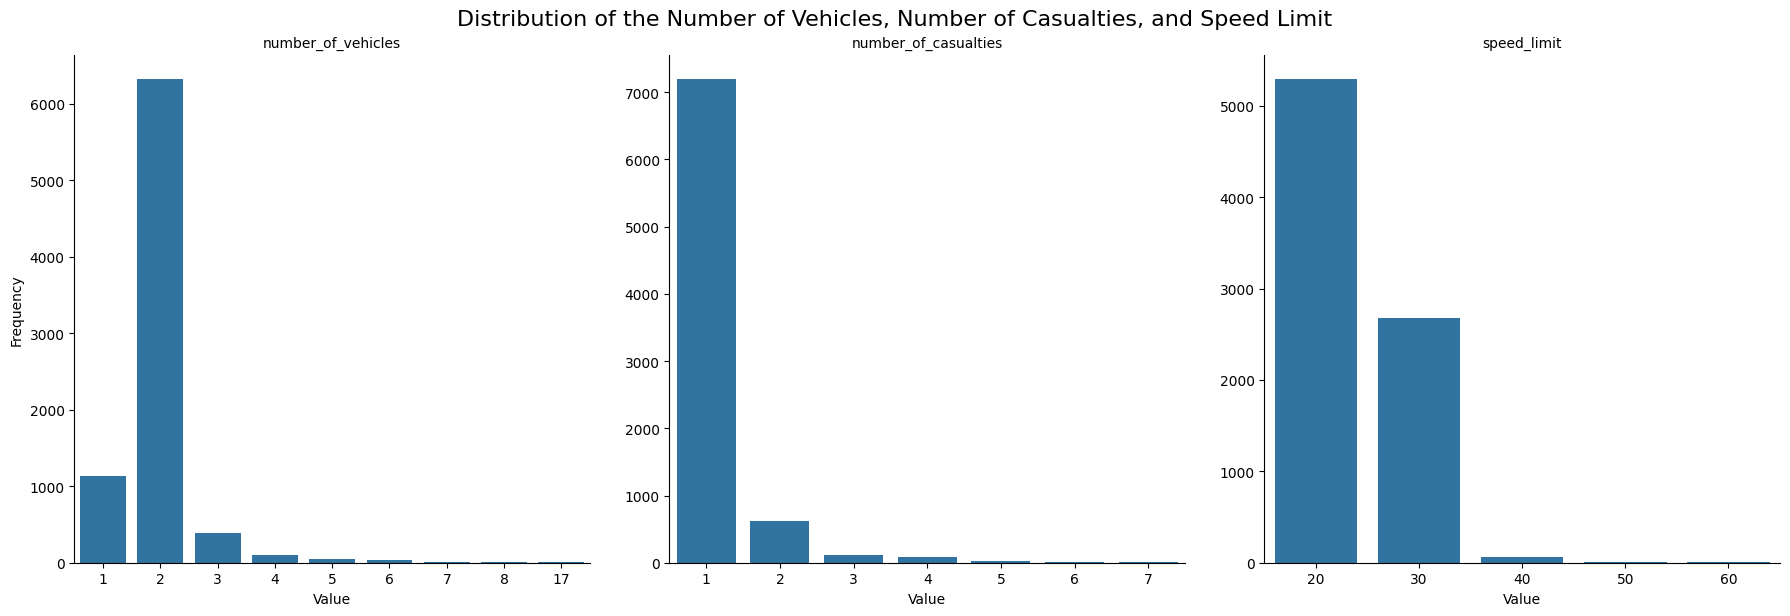

In [60]:
#Prepare and reshape the data into 3 columns using FacetGrid with the melt function
facet_data = X_train[['number_of_vehicles','number_of_casualties','speed_limit']].melt()
 
#Create the FacetGrid which plots facets by their 'variable' column
g = sns.FacetGrid(facet_data, col="variable", col_wrap=3, height=6, sharex=False, sharey=False)
 
#Map the appropriate plot to each facet based on the variable type
def plot_facet(variable, **kwargs):
    data = kwargs.pop('data')
    sns.countplot(x=data['value'], **kwargs)
 
g.map_dataframe(plot_facet, 'value')
 
#Remove gridlines from all plots using a for loop
for ax in g.axes.flat:
    ax.grid(False)
 
#Set the title for each facet dynamically to the column name
g.set_titles("{col_name}")
 
#Set labels for the x and y axes
g.set_axis_labels("Value", "Frequency")
 
#Main title for the entire plot and adjust its position
g.fig.suptitle("Distribution of the Number of Vehicles, Number of Casualties, and Speed Limit", fontsize=16, y=1.02)
 
#Display the plots
plt.show()

Most accidents involved two vehicles, at least one casualty, and occurred on 20 mph roads.

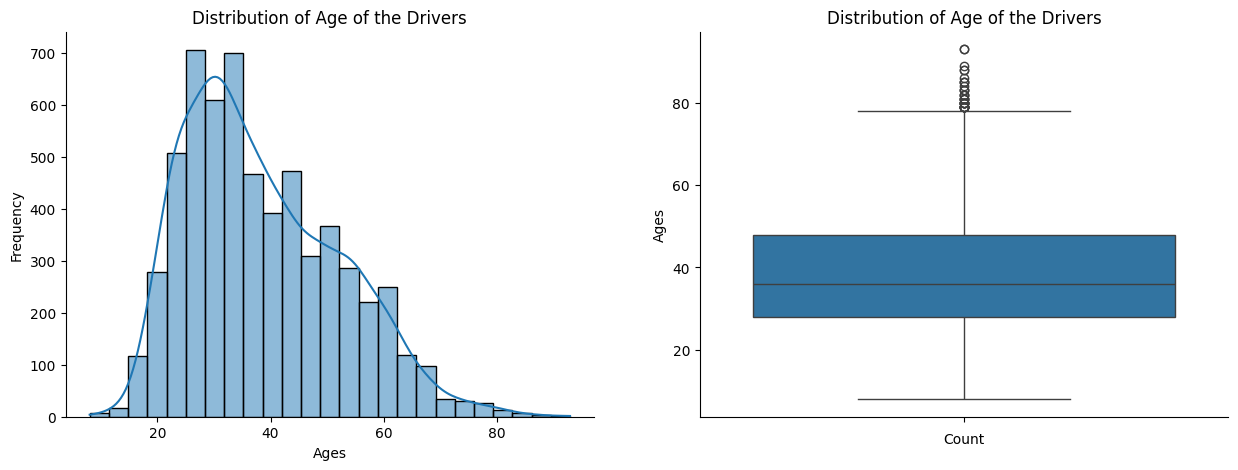

In [62]:
#Set the figure size
fig = plt.figure(figsize=(15, 5))

#Histogram
plt.subplot(1, 2, 1)

#Define plot object using histplot
hist = sns.histplot(X_train.loc[:, 'age_of_driver'], bins=25, kde=True)

#Setting graph title and labels
hist.set_title('Distribution of Age of the Drivers')
hist.set(xlabel='Ages', ylabel='Frequency')

#Boxplot
plt.subplot(1,2,2)

#Define plot object
box = sns.boxplot(X_train.loc[:,'age_of_driver'])

#Setting graph title
box.set_title( 'Distribution of Age of the Drivers')
box.set(xlabel = 'Count', ylabel = 'Ages')

#Remove borders (spines)
sns.despine(fig=fig, right=True, top=True)

plt.show()

Most drivers were aged 25–35, with few outliers over 80.

#### Categorical Variables

In [65]:
#There are 20 categorical predictor variables.
#Converting all the numerical values into their actual values in the dataset
for column in X_train.columns:
    if column in guide_data['field name'].values:
        #Creating a dictionary to map code/format to label for each field_name
        mapping_dict = guide_data[guide_data['field name'] == column].set_index('code/format')['label'].to_dict()
        #Replacing the values in top_5_boroughs based on the mapping dictionary
        if mapping_dict:
            X_train[column] = X_train[column].map(mapping_dict).fillna(X_train[column])

for column in X_test.columns:
    if column in guide_data['field name'].values:
        #Creating a dictionary to map code/format to label for each field_name
        mapping_dict = guide_data[guide_data['field name'] == column].set_index('code/format')['label'].to_dict()
        #Replacing the values in top_5_boroughs based on the mapping dictionary
        if mapping_dict:
            X_test[column] = X_test[column].map(mapping_dict).fillna(X_test[column])

#Examine the newly converted data   
X_train.head()

,accident_index,time,number_of_vehicles,number_of_casualties,date,local_authority_ons_district,road_type,speed_limit,junction_detail,junction_control,...,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_of_driver,vehicle_type,vehicle_manoeuvre,casualty_type
2142,2023010435768,1900-01-01 19:35:00,2.0,1.0,2023-02-27,Lambeth,Unknown,30,Not at junction or within 20 metres,NaN,...,unknown (self reported),unknown (self reported),unknown (self reported),Front,Not known,Male,26.0,Motorcycle 125cc and under,unknown (self reported),Motorcycle 125cc and under rider or passenger
1930,2023010434377,1900-01-01 15:09:00,1.0,1.0,2023-03-24,Lambeth,Unknown,20,Not at junction or within 20 metres,NaN,...,unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),Not known,Not known,NaN,Car,unknown (self reported),Car occupant
8757,2023010477755,1900-01-01 17:00:00,2.0,1.0,2023-11-10,Lambeth,Single carriageway,30,T or staggered junction,Give way or uncontrolled,...,unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),Journey as part of work,Male,25.0,Motorcycle 125cc and under,unknown (self reported),Motorcycle 125cc and under rider or passenger
9327,2023010481441,1900-01-01 17:15:00,2.0,1.0,2023-12-01,Lambeth,Unknown,20,unknown (self reported),unknown (self reported),...,unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),Not known,Female,64.0,Car,unknown (self reported),Pedestrian
7125,2023010467051,1900-01-01 18:40:00,2.0,1.0,2023-09-19,Wandsworth,Single carriageway,20,Not at junction or within 20 metres,NaN,...,0,Did not leave carriageway,0,Did not impact,Journey as part of work,Male,60.0,Bus or coach (17 or more pass seats),Waiting to go - held up,Bus or coach occupant (17 or more pass seats)


In [66]:
#Create functions used for analyzing descriptive statistics and plot the categorical variable

#Function to describe the variable
def describe_column(data, column):
    # Get value counts and mode
    value_counts_result = data[column].value_counts().reset_index()
    value_counts_result.columns = ['Category', 'Frequency']
    mode_value = data[column].mode().iloc[0]  # Get the first mode
    
    # Display the result
    print(f"Descriptive Statistics for {column}:")
    print(f"Mode: {mode_value}")
    display(value_counts_result)
    print("\n" + "-"*80)  # Separator for readability

#Function to plot the variable
def plot_countplot(data, column):
    
    #Create figure
    plt.figure(figsize=(10, 6))
    
    #Create countplot
    ax = sns.countplot(data=data, x=column)
    
    #Apply customizations
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(False)
    ax.set_title(f'Distribution of {column}', fontsize=14)
    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    
    #Remove plot borders
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    #Adjust layout and show plot
    plt.tight_layout()
    plt.show()

#### local_authority_ons_district

Descriptive Statistics for local_authority_ons_district:
Mode: Westminster


,Category,Frequency
0,Westminster,1764
1,Croydon,1681
2,Wandsworth,1587
3,Southwark,1513
4,Lambeth,1505



--------------------------------------------------------------------------------


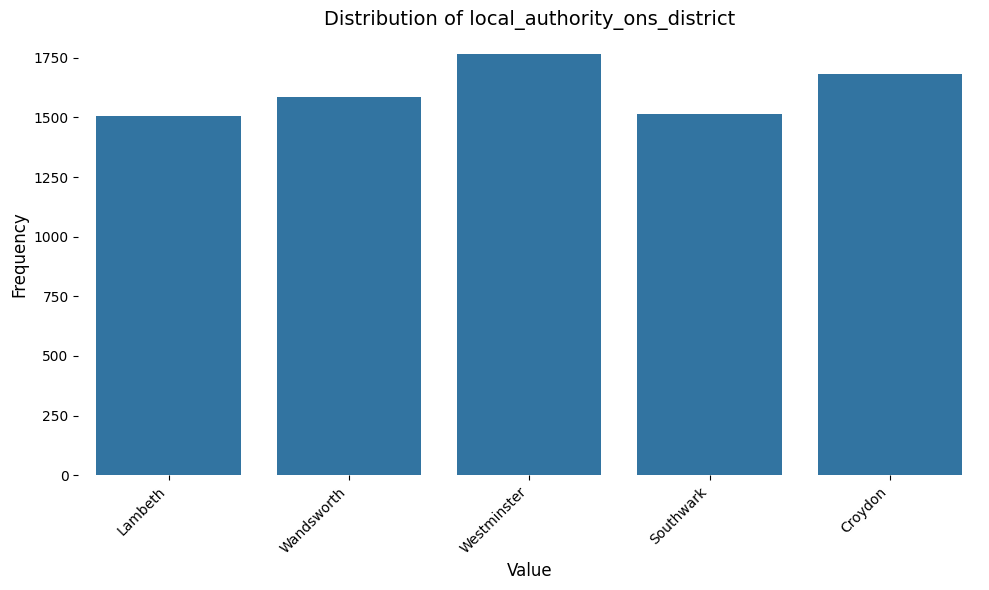

In [68]:
#Use the previously created functions to describe and plot the categorical variable
describe_column(X_train, 'local_authority_ons_district')
plot_countplot(X_train, 'local_authority_ons_district')

Accidents were most frequent in Westminster (1,764), with most boroughs reporting 1,505–1,764 incidents.

#### road_type

Descriptive Statistics for road_type:
Mode: Single carriageway


,Category,Frequency
0,Single carriageway,4923
1,Dual carriageway,1053
2,Unknown,984
3,One way street,657
4,Roundabout,303
5,Slip road,130



--------------------------------------------------------------------------------


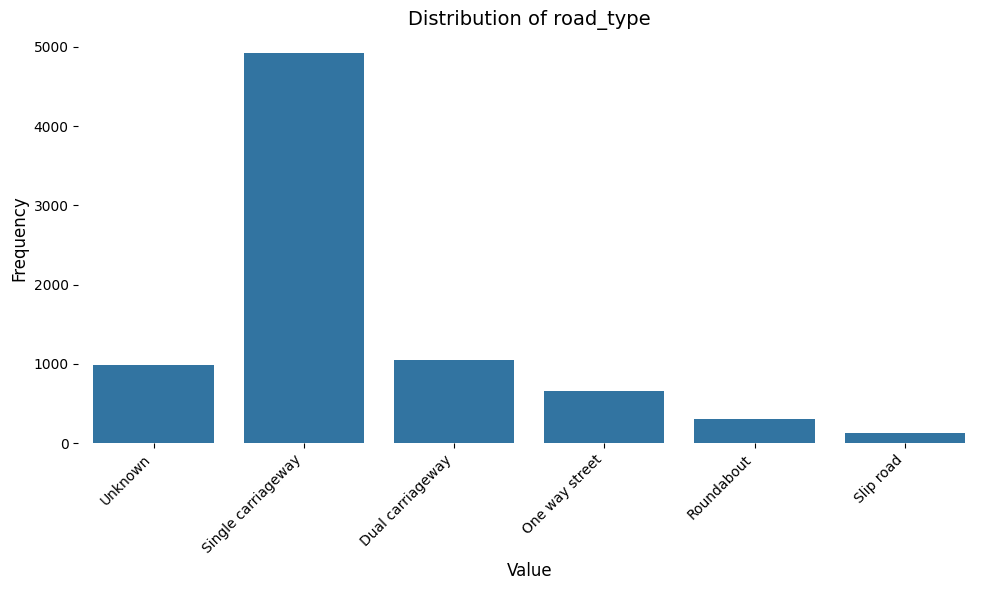

In [71]:
#Use the previously created functions to describe and plot the categorical variable
describe_column(X_train, 'road_type')
plot_countplot(X_train, 'road_type')

Single carriageways had the most accidents (4,923), suggesting higher risk due to traffic volume.

#### junction_detail

Descriptive Statistics for junction_detail:
Mode: T or staggered junction


,Category,Frequency
0,T or staggered junction,2759
1,Not at junction or within 20 metres,1371
2,Crossroads,1234
3,unknown (self reported),1087
4,Other junction,733
5,More than 4 arms (not roundabout),292
6,Roundabout,268
7,Private drive or entrance,139
8,Slip road,84
9,Mini-roundabout,83



--------------------------------------------------------------------------------


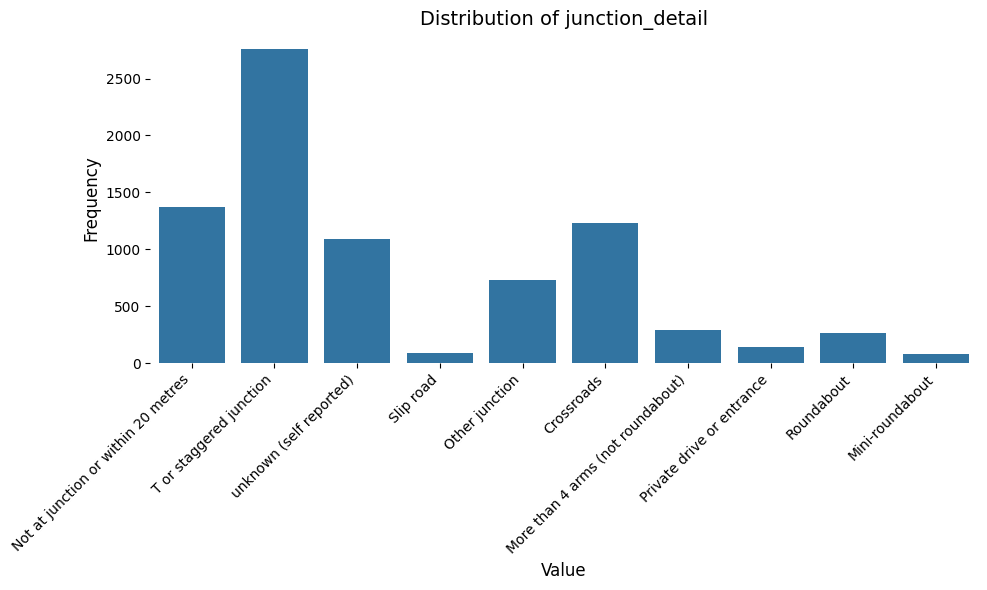

In [74]:
#Use the previously created functions to describe and plot the categorical variable
describe_column(X_train, 'junction_detail')
plot_countplot(X_train, 'junction_detail')

Accidents were rarer at slip roads and mini-roundabouts (<100), with higher rates at busy junctions like T-junctions and crossroads.

#### junction_control

Descriptive Statistics for junction_control:
Mode: Give way or uncontrolled


,Category,Frequency
0,Give way or uncontrolled,3506
1,Auto traffic signal,1991
2,unknown (self reported),1004
3,Stop sign,136
4,Authorised person,42



--------------------------------------------------------------------------------


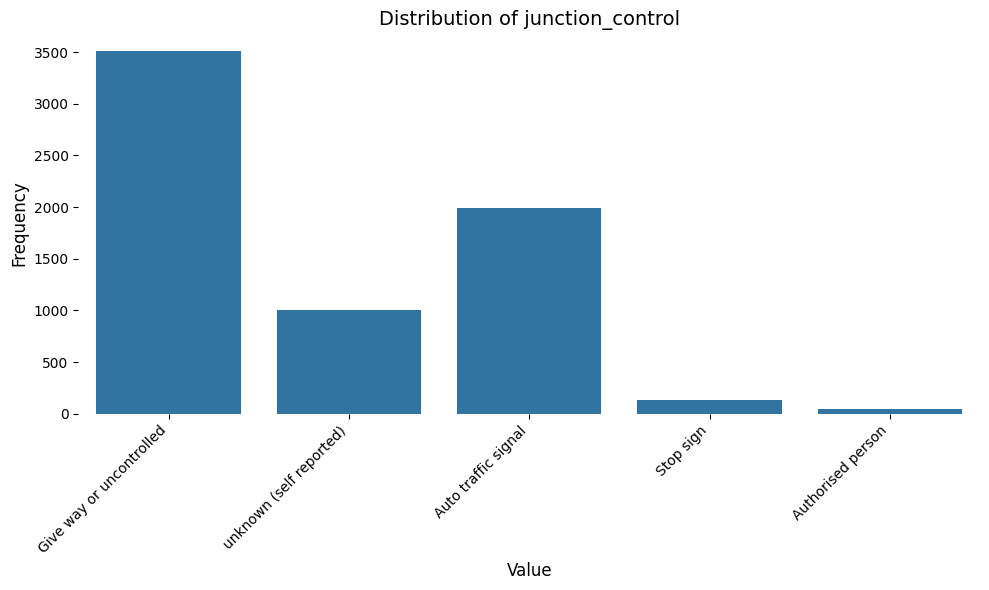

In [77]:
#Use the previously created functions to describe and plot the categorical variable
describe_column(X_train, 'junction_control')
plot_countplot(X_train, 'junction_control')

Junction controls such as "Stop sign" and "Authorised person" had the lowest number of accidents, while give-way signs saw the highest accident rates.

#### light_conditions

Descriptive Statistics for light_conditions:
Mode: Daylight


,Category,Frequency
0,Daylight,5523
1,Darkness - lights lit,2273
2,Darkness - lighting unknown,180
3,Darkness - lights unlit,40
4,Darkness - no lighting,34



--------------------------------------------------------------------------------


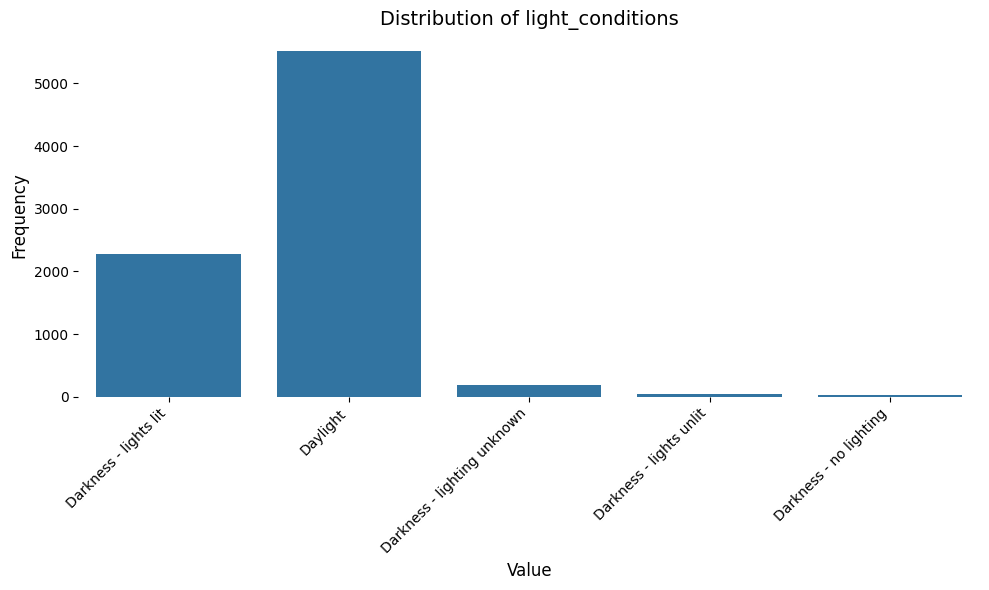

In [80]:
#Use the previously created functions to describe and plot the categorical variable
describe_column(X_train, 'light_conditions')
plot_countplot(X_train, 'light_conditions')

Accidents were the most common in daylight conditions (5523), while poorly lit or unlit conditions saw far fewer, highlighting the importance of visibility.

#### weather_conditions

Descriptive Statistics for weather_conditions:
Mode: Fine no high winds


,Category,Frequency
0,Fine no high winds,5952
1,Raining no high winds,854
2,Unknown,766
3,Other,364
4,Raining + high winds,48
5,Fine + high winds,41
6,Fog or mist,13
7,Snowing no high winds,12



--------------------------------------------------------------------------------


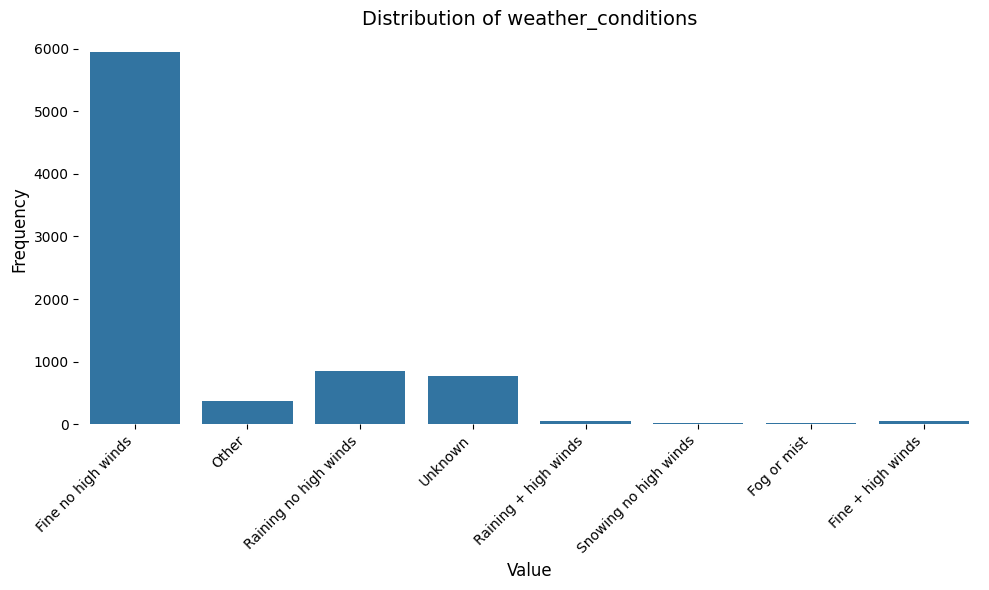

In [83]:
#Use the previously created functions to describe and plot the categorical variable
describe_column(X_train, 'weather_conditions')
plot_countplot(X_train, 'weather_conditions')

Most accidents occured in Fine conditions with no high winds (5952), while the four weather conditions starting from right saw <50 each.

#### road_surface_conditions

Descriptive Statistics for road_surface_conditions:
Mode: Dry


,Category,Frequency
0,Dry,5817
1,Wet or damp,1503
2,unknown (self reported),705
3,Frost or ice,22
4,Flood over 3cm. deep,2
5,Snow,1



--------------------------------------------------------------------------------


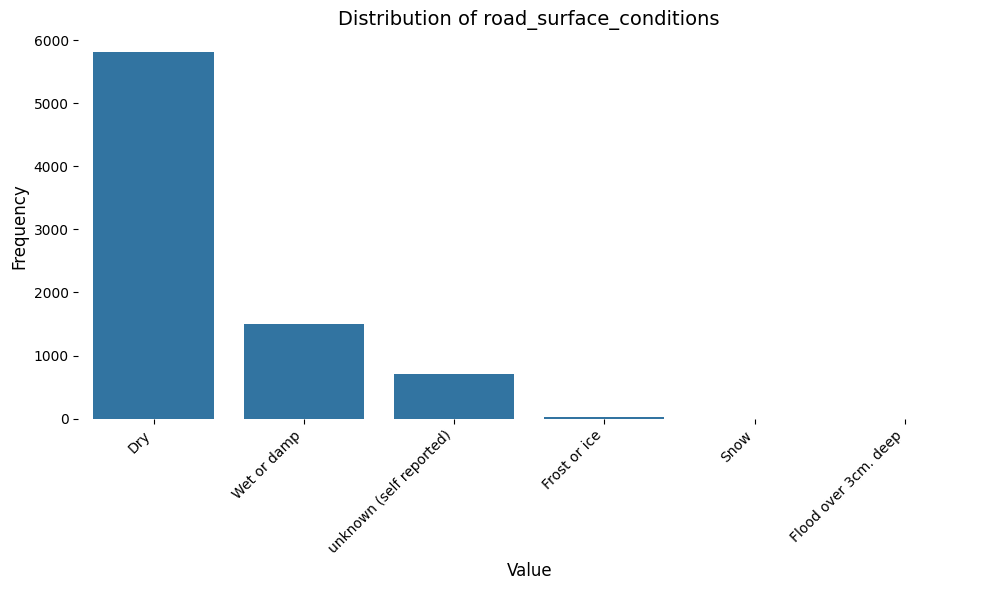

In [86]:
#Use the previously created functions to describe and plot the categorical variable
describe_column(X_train, 'road_surface_conditions')
plot_countplot(X_train, 'road_surface_conditions')

Most accidents occurred on dry roads (5,817), followed by wet conditions (1,503), with frost, ice, and flooding incidents being rare (<22).

#### urban_or_rural_area

Descriptive Statistics for urban_or_rural_area:
Mode: Urban


,Category,Frequency
0,Urban,7984
1,Rural,66



--------------------------------------------------------------------------------


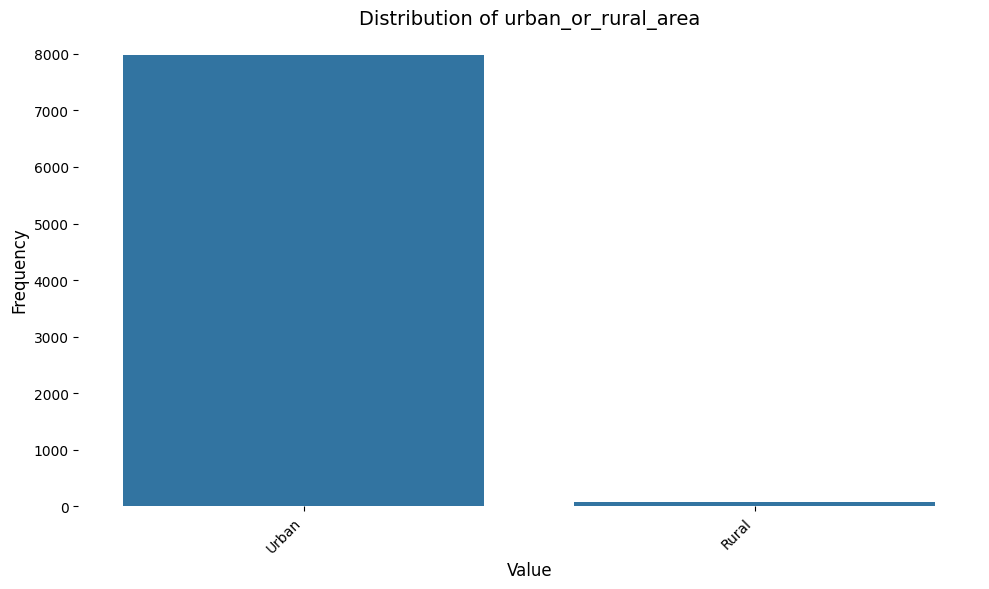

In [89]:
#Use the previously created functions to describe and plot the categorical variable
describe_column(X_train, 'urban_or_rural_area')
plot_countplot(X_train, 'urban_or_rural_area')

Urban areas saw 7,984 accidents vs. 66 in rural areas, highlighting higher risk in densely populated areas.

#### vehicle_location_restricted_lane

Descriptive Statistics for vehicle_location_restricted_lane:
Mode: On main c'way - not in restricted lane


,Category,Frequency
0,On main c'way - not in restricted lane,4140
1,unknown (self reported),3479
2,Bus lane,172
3,Cycle lane (on main carriageway),97
4,Footway (pavement),80
5,Cycleway or shared use footway (not part of m...,29
6,On lay-by or hard shoulder,23
7,Tram/Light rail track,13
8,Leaving lay-by or hard shoulder,7
9,Busway (including guided busway),5



--------------------------------------------------------------------------------


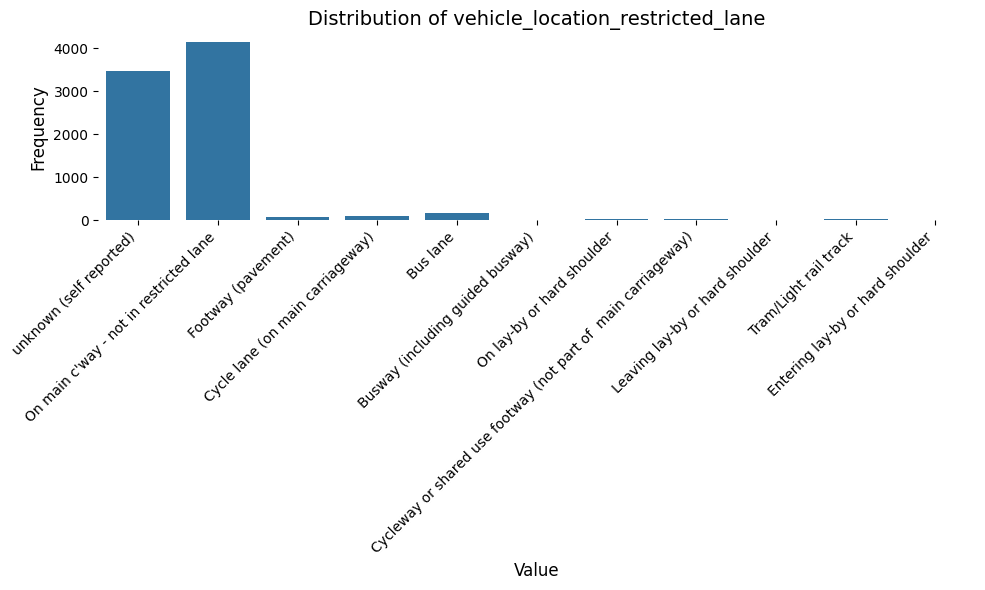

In [92]:
#Use the previously created functions to describe and plot the categorical variable
describe_column(X_train, 'vehicle_location_restricted_lane')
plot_countplot(X_train, 'vehicle_location_restricted_lane')

Most accidents occurred on main carriageways (4,140) and unknown locations (3,479), while restricted lanes saw far fewer incidents.

#### junction_location

Descriptive Statistics for junction_location:
Mode: unknown (self reported)


,Category,Frequency
0,unknown (self reported),2984
1,Approaching junction or waiting/parked at junc...,1764
2,Not at or within 20 metres of junction,1371
3,Mid Junction - on roundabout or on main road,827
4,Cleared junction or waiting/parked at junction...,493
5,Entering main road,249
6,Leaving main road,221
7,Entering roundabout,73
8,Leaving roundabout,50
9,Entering from slip road,18



--------------------------------------------------------------------------------


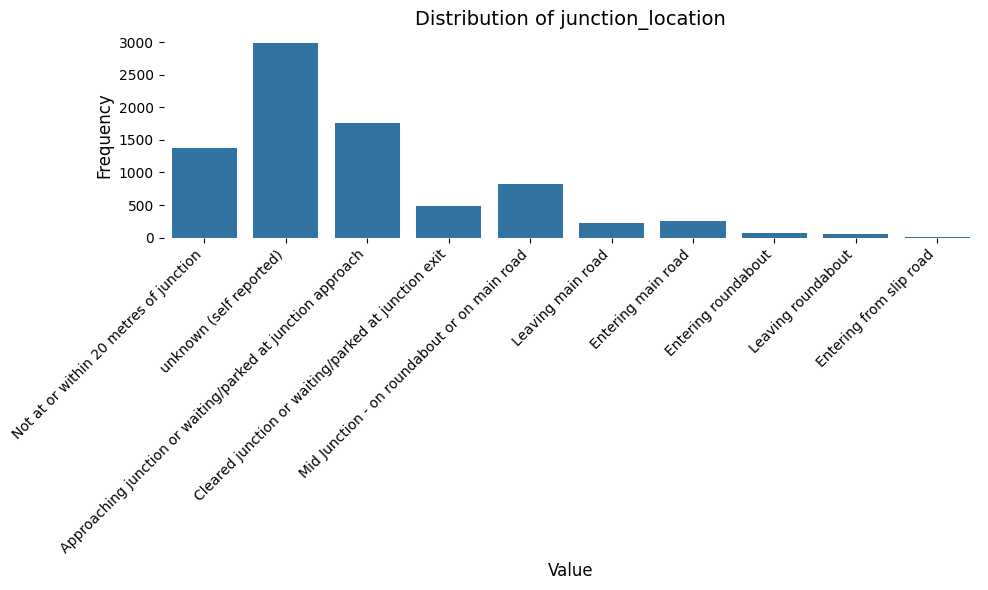

In [95]:
#Use the previously created functions to describe and plot the categorical variable
describe_column(X_train, 'junction_location')
plot_countplot(X_train, 'junction_location')

Out of all the reported known junction locations approaching junction or waiting/parked at junction apporach was the highest (1764) followed by not at or within 20 metres of junction (1371)

#### skidding_and_overturning

Descriptive Statistics for skidding_and_overturning:
Mode: 0


,Category,Frequency
0,0,4060
1,unknown (self reported),3613
2,Skidded,166
3,Overturned,132
4,Skidded and overturned,79



--------------------------------------------------------------------------------


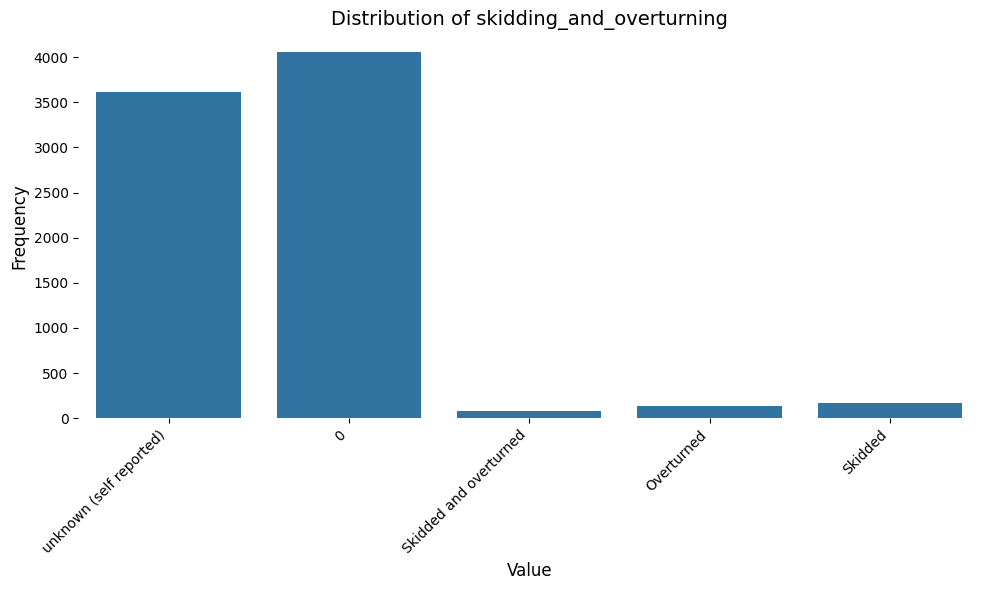

In [98]:
#Use the previously created functions to describe and plot the categorical variable
describe_column(X_train, 'skidding_and_overturning')
plot_countplot(X_train, 'skidding_and_overturning')

Most incidents didn’t involve any skidding or overturning (4,060), but while such events were rare to happen, they were still relevant for safety improvements.

#### hit_object_in_carriageway

Descriptive Statistics for hit_object_in_carriageway:
Mode: 0


,Category,Frequency
0,0,4143
1,unknown (self reported),3559
2,Parked vehicle,159
3,Kerb,62
4,Other object,50
5,Open door of vehicle,36
6,Bollard or refuge,28
7,Previous accident,6
8,Any animal (except ridden horse),4
9,Bridge (roof),1



--------------------------------------------------------------------------------


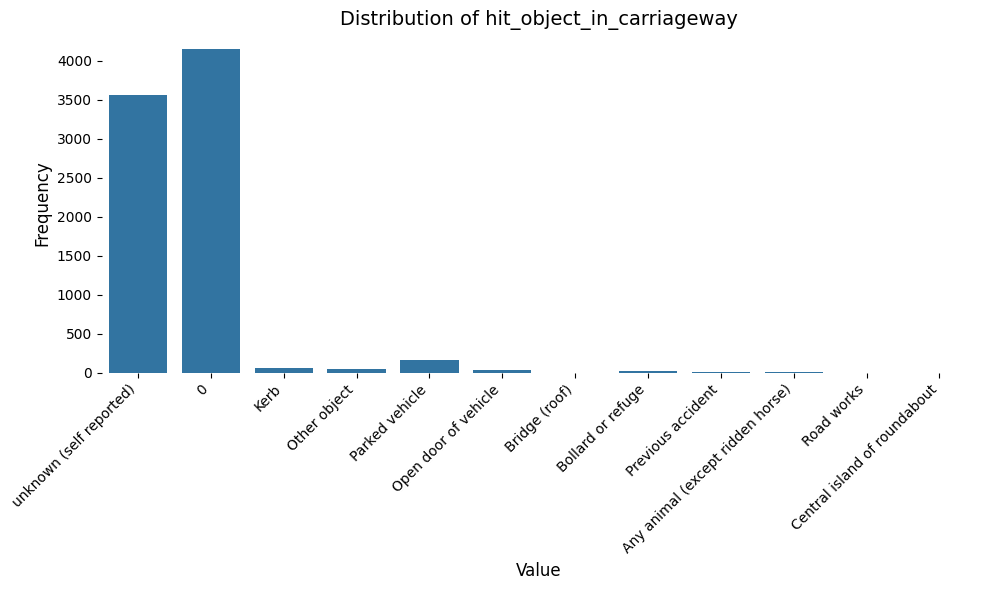

In [101]:
#Use the previously created functions to describe and plot the categorical variable
describe_column(X_train, 'hit_object_in_carriageway')
plot_countplot(X_train, 'hit_object_in_carriageway')

Most incidents didn’t involve hitting objects in carriageway (4,143), with parked vehicles being the most common among the few object-related cases.

#### vehicle_leaving_carriageway

Descriptive Statistics for vehicle_leaving_carriageway:
Mode: Did not leave carriageway


,Category,Frequency
0,Did not leave carriageway,4271
1,unknown (self reported),3529
2,Nearside,147
3,Offside,56
4,Straight ahead at junction,28
5,Offside and rebounded,8
6,Nearside and rebounded,6
7,Offside on to central reservation,3
8,Offside - crossed central reservation,2



--------------------------------------------------------------------------------


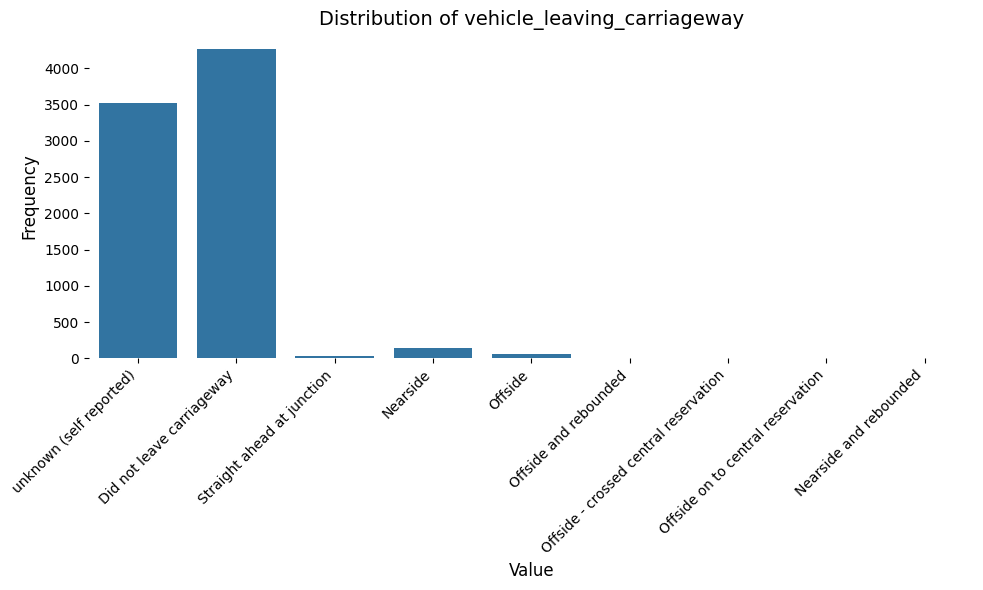

In [104]:
#Use the previously created functions to describe and plot the categorical variable
describe_column(X_train, 'vehicle_leaving_carriageway')
plot_countplot(X_train, 'vehicle_leaving_carriageway')

Most incidents didn’t involve vehicles leaving the carriageway (4,271), but when they did, nearside departures (147) were most common followed by offside (56).

#### hit_object_off_carriageway

Descriptive Statistics for hit_object_off_carriageway:
Mode: 0


,Category,Frequency
0,0,4452
1,unknown (self reported),3502
2,Wall or fence,27
3,Lamp post,19
4,Other permanent object,18
5,Road sign or traffic signal,13
6,Tree,6
7,Bus stop or bus shelter,6
8,Near/Offside crash barrier,4
9,Telegraph or electricity pole,2



--------------------------------------------------------------------------------


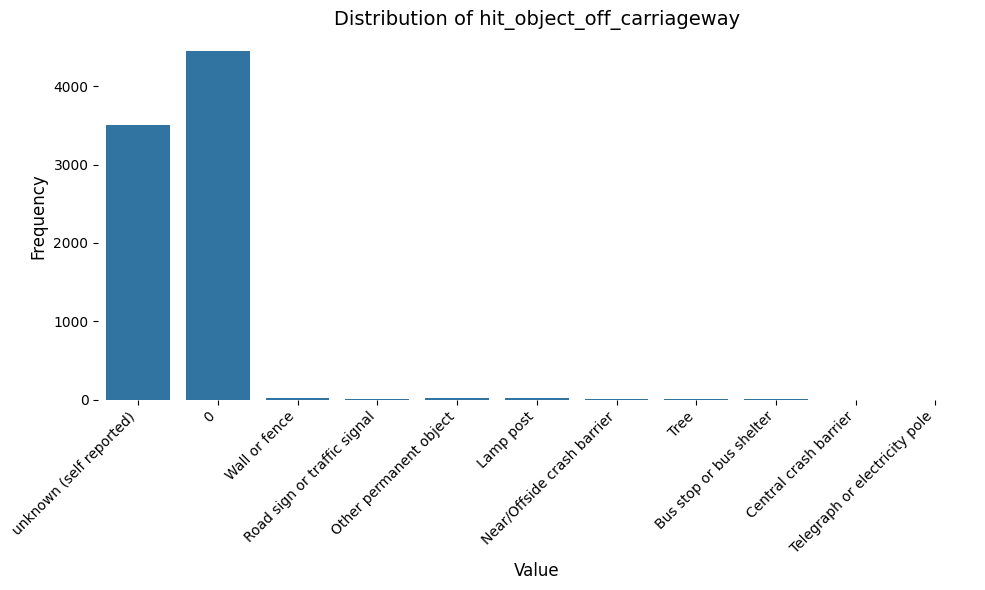

In [107]:
#Use the previously created functions to describe and plot the categorical variable
describe_column(X_train, 'hit_object_off_carriageway')
plot_countplot(X_train, 'hit_object_off_carriageway')

Most incidents didn’t involve hitting objects off the carriageway, but walls or fences (27), and lamp posts (19) were the most commonly struck when they did.

#### first_point_of_impact

Descriptive Statistics for first_point_of_impact:
Mode: Front


,Category,Frequency
0,Front,3680
1,unknown (self reported),1769
2,Back,904
3,Offside,600
4,Nearside,579
5,Did not impact,518



--------------------------------------------------------------------------------


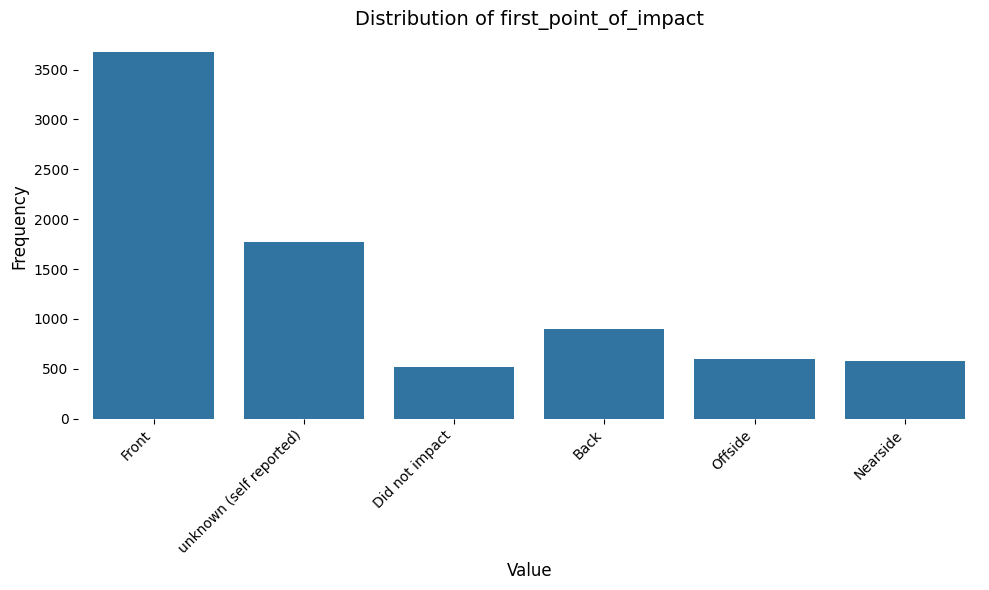

In [110]:
#Use the previously created functions to describe and plot the categorical variable
describe_column(X_train, 'first_point_of_impact')
plot_countplot(X_train, 'first_point_of_impact')

Frontal impacts were the most common (3,680), followed by rear impacts (904) amongst the reported areas of impact, highlighting the prevalence of head-on or rear-end collisions.

#### journey_purpose_of_driver

Descriptive Statistics for journey_purpose_of_driver:
Mode: Not known


,Category,Frequency
0,Not known,5423
1,Journey as part of work,1501
2,Commuting to/from work,1052
3,Taking pupil to/from school,57
4,Pupil riding to/from school,16
5,Other,1



--------------------------------------------------------------------------------


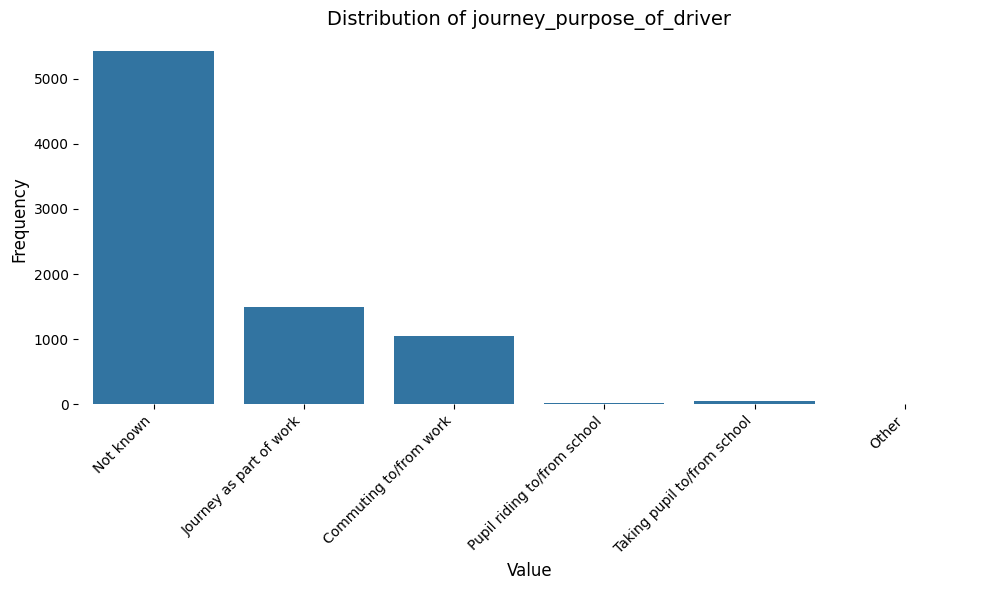

In [113]:
#Use the previously created functions to describe and plot the categorical variable
describe_column(X_train, 'journey_purpose_of_driver')
plot_countplot(X_train, 'journey_purpose_of_driver')

Out of the known journey purpose of the driver journey as part of work involved the highest number of accidents (1501), followed by work-related travel (1,052) and commuting (1,052), with school related journeys being rare.

#### sex_of_driver

Descriptive Statistics for sex_of_driver:
Mode: Male


,Category,Frequency
0,Male,4697
1,Not known,2186
2,Female,1167



--------------------------------------------------------------------------------


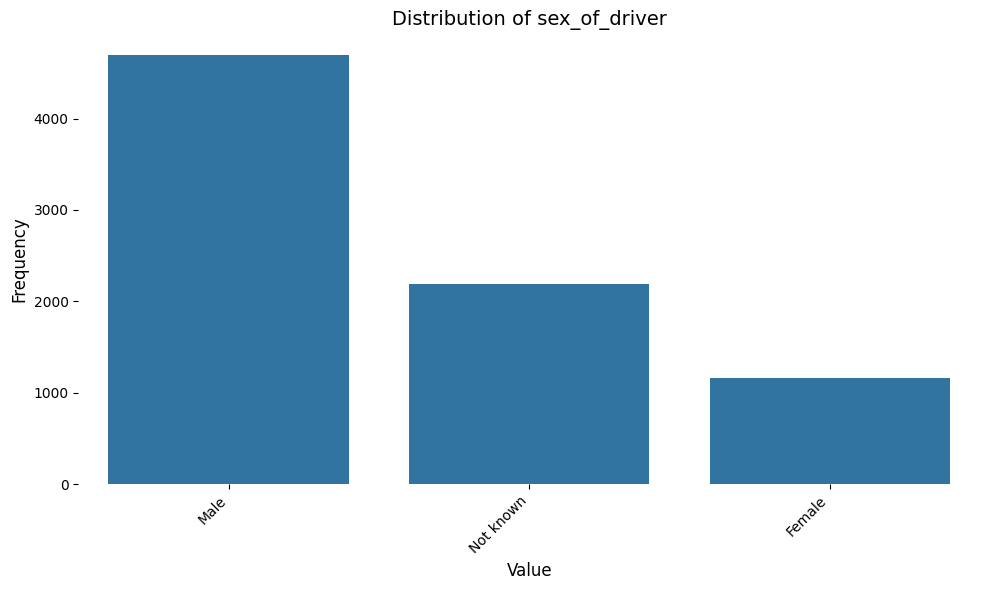

In [116]:
#Use the previously created functions to describe and plot the categorical variable
describe_column(X_train, 'sex_of_driver')
plot_countplot(X_train, 'sex_of_driver')

Male drivers were involved in most incidents (4,697), but many cases (2,186) lacked gender data, highlighting gaps in demographic reporting.

#### vehicle_type

Descriptive Statistics for vehicle_type:
Mode: Car


,Category,Frequency
0,Car,3667
1,Pedal cycle,1361
2,Motorcycle 125cc and under,1180
3,Van / Goods 3.5 tonnes mgw or under,454
4,Taxi/Private hire car,369
5,Bus or coach (17 or more pass seats),352
6,Motorcycle over 500cc,180
7,Motorcycle over 125cc and up to 500cc,139
8,Other vehicle,109
9,Motorcycle 50cc and under,79



--------------------------------------------------------------------------------


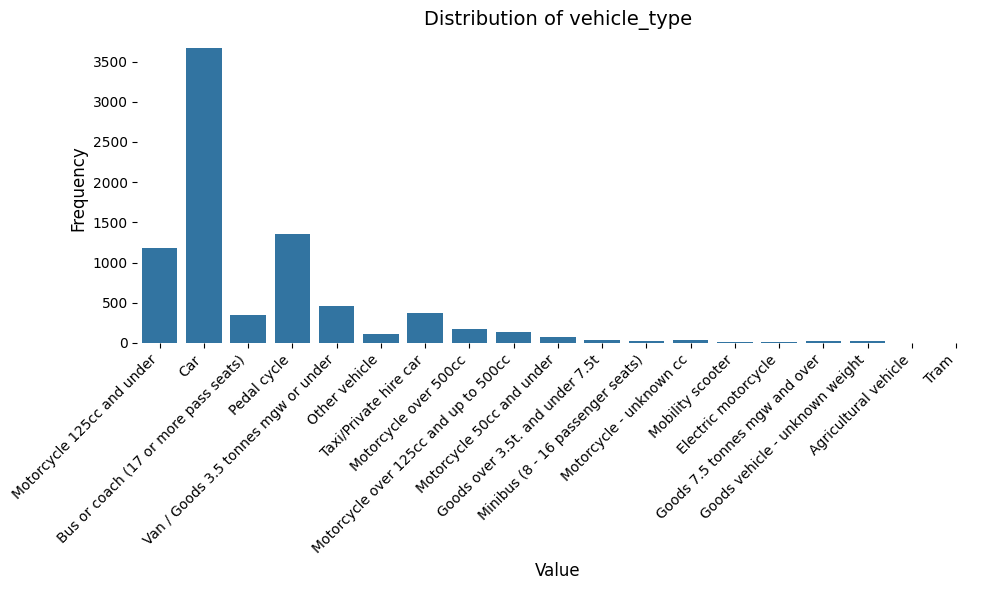

In [119]:
#Use the previously created functions to describe and plot the categorical variable
describe_column(X_train, 'vehicle_type')
plot_countplot(X_train, 'vehicle_type')

Cars were most involved in incidents (3,667), followed by pedal cycles (1,361) and small motorcycles (1,180), highlighting the dominance of personal vehicles in accidents.

#### vehicle_manoeuvre

Descriptive Statistics for vehicle_manoeuvre:
Mode: unknown (self reported)


,Category,Frequency
0,unknown (self reported),3503
1,Going ahead other,1985
2,Turning right,541
3,Moving off,398
4,Slowing or stopping,270
5,Turning left,248
6,Waiting to go - held up,240
7,Parked,186
8,Overtaking moving vehicle - offside,113
9,Overtaking static vehicle - offside,83



--------------------------------------------------------------------------------


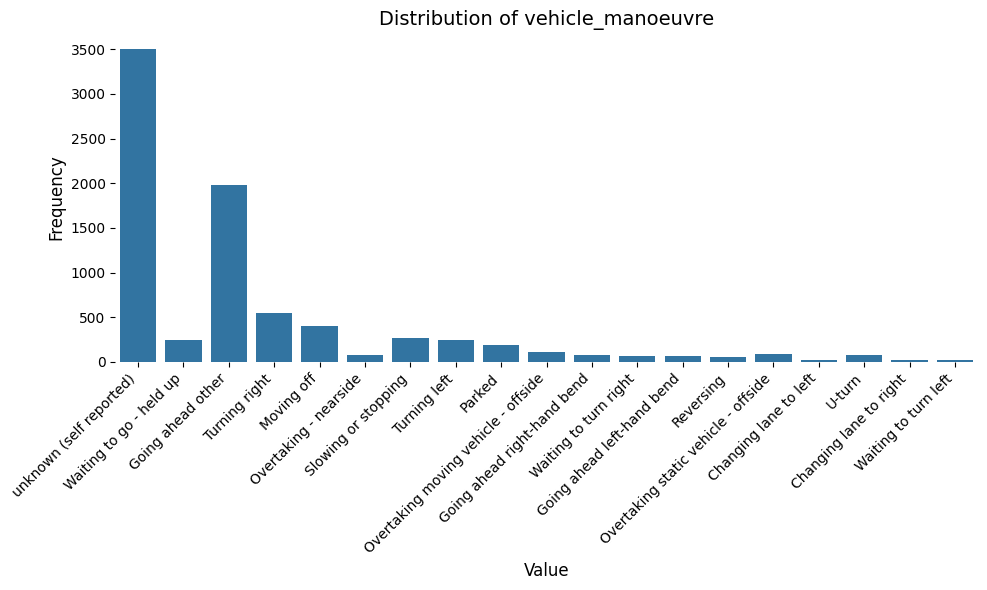

In [122]:
#Use the previously created functions to describe and plot the categorical variable
describe_column(X_train, 'vehicle_manoeuvre')
plot_countplot(X_train, 'vehicle_manoeuvre')

Most manoeuvres were marked as "unknown" (3,503), with "Going ahead other" (1,985) being the most common known action, while complex moves like lane changes were rare.

#### casualty_type

Descriptive Statistics for casualty_type:
Mode: Cyclist


,Category,Frequency
0,Cyclist,2344
1,Motorcycle 125cc and under rider or passenger,2104
2,Car occupant,1455
3,Pedestrian,871
4,Motorcycle over 500cc rider or passenger,290
5,Motorcycle over 125cc and up to 500cc rider or...,227
6,Bus or coach occupant (17 or more pass seats),224
7,Taxi/Private hire car occupant,169
8,Van / Goods vehicle (3.5 tonnes mgw or under) ...,108
9,Other vehicle occupant,93



--------------------------------------------------------------------------------


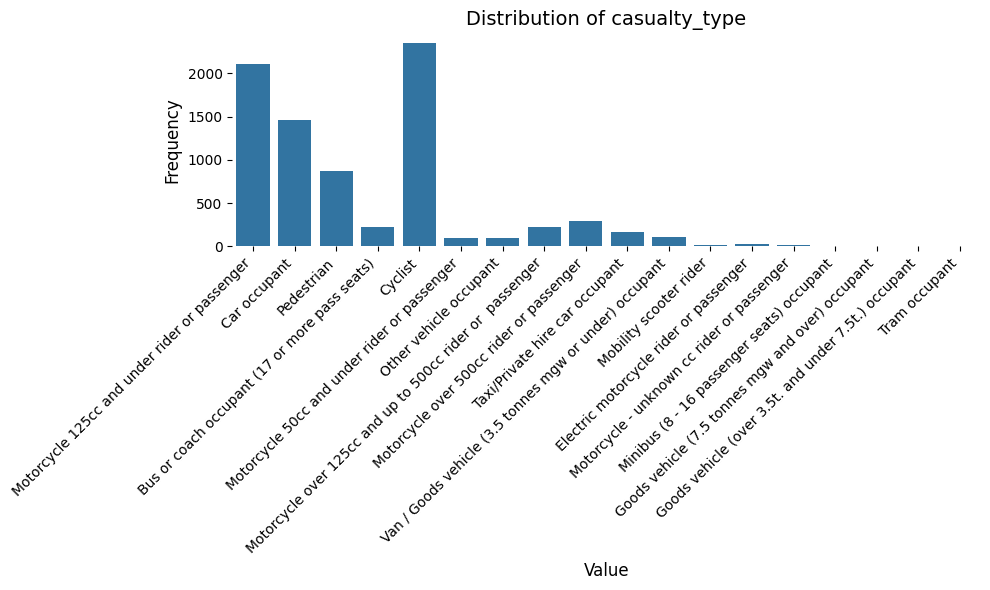

In [125]:
#Use the previously created functions to describe and plot the categorical variable
describe_column(X_train, 'casualty_type')
plot_countplot(X_train, 'casualty_type')

Cyclists and small motorcycle riders were involved in the most accidents, highlighting higher risks for vulnerable two-wheel road users.

## Bivariate Analysis

Relationships between the target and independent variables were explored using visualizations to assess their potential impact.

In [129]:
#Create a copy y_train dataset that has all its numerical codes converted into their actual categorical labels:
y_train_with_labels = pd.DataFrame(y_train).copy()

for column in y_train_with_labels.columns:
    if column in guide_data['field name'].values:
        # Creating a dictionary to map code/format to label for each field_name
        mapping_dict = guide_data[guide_data['field name'] == column].set_index('code/format')['label'].to_dict()
        # Replacing the values in top_5_boroughs based on the mapping dictionary
        if mapping_dict:
            y_train_with_labels[column] = y_train_with_labels[column].map(mapping_dict).fillna(y_train_with_labels[column])

y_train_with_labels.head()

,accident_severity
2142,Slight
1930,Slight
8757,Slight
9327,Slight
7125,Serious


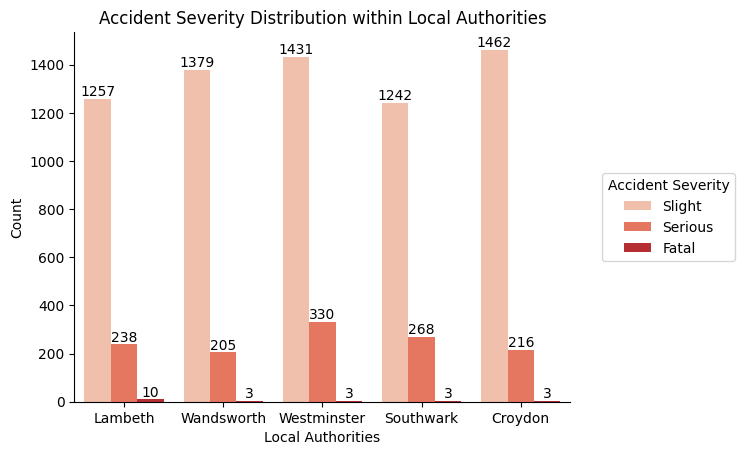

In [130]:
#Merge the datasets
merged_data = pd.merge(X_train, y_train_with_labels, left_index=True, right_index=True)

#Plot accident_severity and location_authority_ons_district on a horizontal bar chart
ax = sns.countplot(data=merged_data, x='local_authority_ons_district', hue='accident_severity', palette='Reds')

#Plot the counts of the bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

#Move the legend to the right of the plot and center the plot
plt.title('Accident Severity Distribution within Local Authorities')
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.xlabel('Local Authorities')
plt.ylabel('Count')

#Cleaner borders
sns.despine()  
plt.show()

Across five London boroughs, slight accidents dominate, with serious cases less common and fatal ones rare.

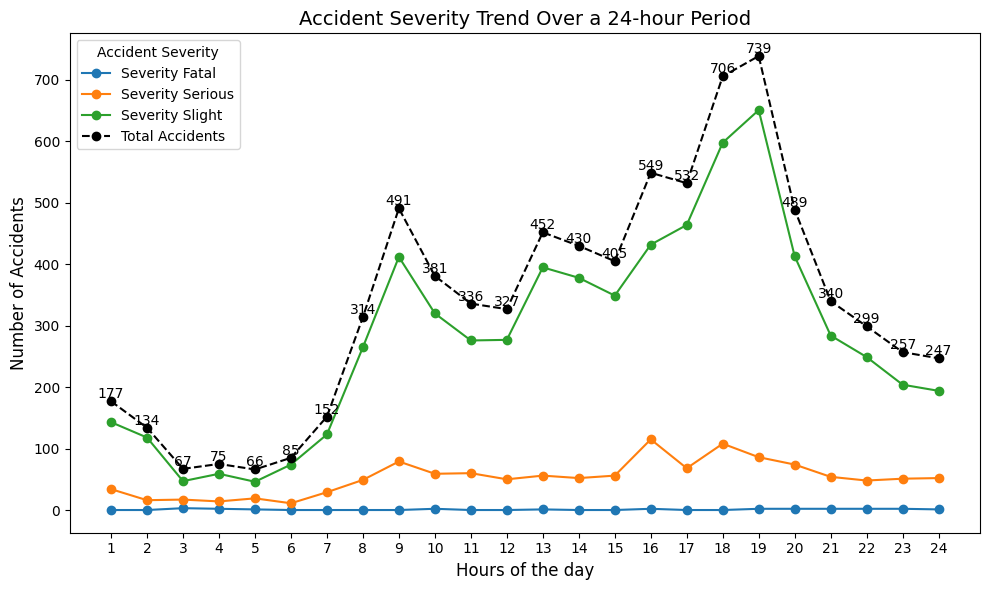

In [132]:
#Line graph for the trend of severity on accidents in a 24 hour period
#Extract the hour from 'time'
merged_data['hour_only'] = merged_data['time'].dt.hour
 
#Grouping by 'hour_only' and 'accident_severity' to get counts
severity_counts = merged_data.groupby(['hour_only', 'accident_severity']).size().unstack(fill_value=0)
 
#Adding a total column for the total number of accidents in each hour
severity_counts['Total'] = severity_counts.sum(axis=1)
 
#Plotting the trend for each accident severity level and total accidents
plt.figure(figsize=(10, 6))
 
#Loop through each unique accident severity level and plot it
for severity in severity_counts.columns[:-1]:  #Exclude 'Total' column from this loop
    plt.plot(severity_counts.index, severity_counts[severity], marker='o', label=f"Severity {severity}")
    
#Plotting the total number of accidents line
plt.plot(severity_counts.index, severity_counts['Total'], marker='o', label="Total Accidents", linestyle='--', color='black')
 
#Adding labels for each point on the total line
for x, y in zip(severity_counts.index, severity_counts['Total']):
    plt.text(x, y, str(int(y)), color='black', ha='center', va='bottom')
    
#Adding labels and title
plt.title("Accident Severity Trend Over a 24-hour Period", fontsize=14)
plt.xlabel("Hours of the day", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
 
#Adding a legend
plt.legend(title="Accident Severity", loc="upper left")
 
#Show the plot
plt.tight_layout()
plt.xticks(severity_counts.index, severity_counts.index + 1)  #Label x-axis from 1 to 24
plt.show()

Accidents peak between 18:00–22:00, mostly slight in severity, with fatal and serious cases remaining low; overall trends form a U-shape, likely tied to rush hour traffic.

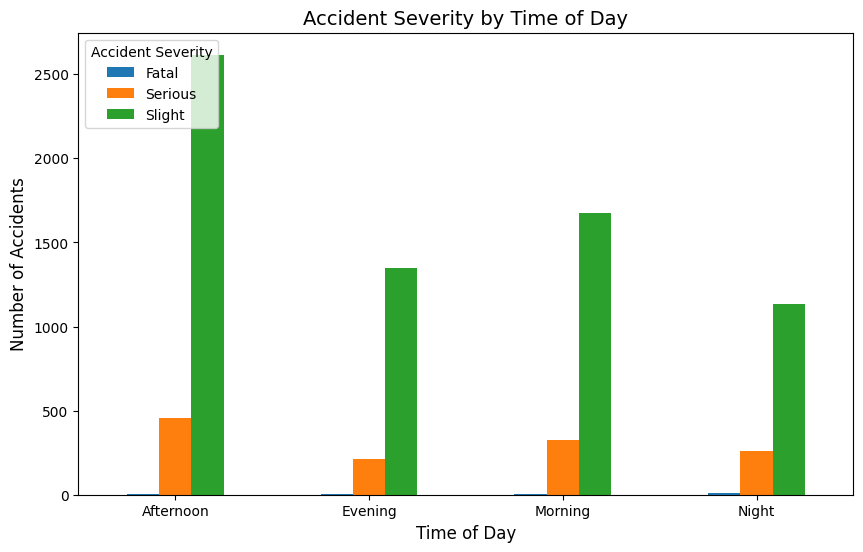

In [134]:
#Bar graph of accident severity by time of day
#Function below classifies periods in a day based on the hour
def categorize_time(time):
    #Extract hour from the timestamp
    hour = time.hour
    if  0 <= hour < 6:
        return "Night"
    elif 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 21:
        return "Evening"
    else:
        return "Night"
    
    
#Apply categorization to 'time' column
merged_data['Time of Day'] = merged_data['time'].apply(categorize_time)
 
#Group by 'Time of Day' and 'Accident Severity' to get counts
severity_counts = merged_data.groupby(['Time of Day', 'accident_severity']).size().unstack(fill_value=0)
 
# Plotting the bar graph
ax= severity_counts.plot(kind='bar', figsize=(10, 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
 
#Adding labels
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, str(int(y)), color='black', ha='center', va='bottom')
        
#Adding labels and title
plt.title("Accident Severity by Time of Day", fontsize=14)
plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.legend(title='Accident Severity', loc="upper left")
 
#Show the plot
plt.show()

Most accidents occur in the afternoon (12–18h), with slight accidents dominating; mornings see slightly more incidents than evenings.

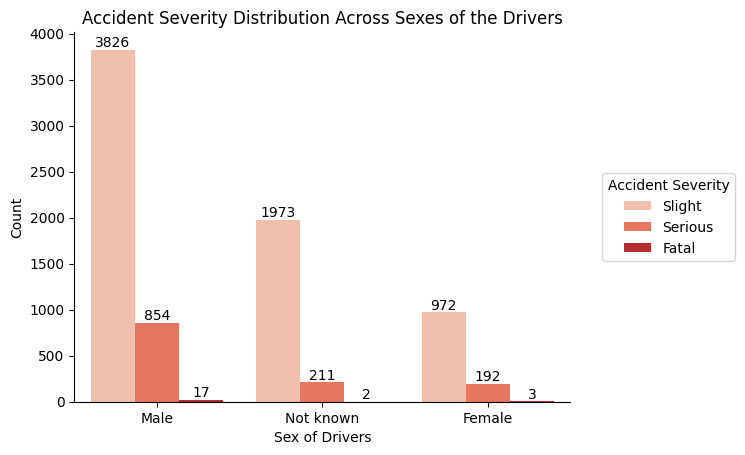

In [136]:
#Plot accident_severity and sex_of_driver on a horizontal bar chart
ax = sns.countplot(data=merged_data, x='sex_of_driver', hue='accident_severity', palette='Reds')

#Plot the counts of the bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

#Move the legend to the right of the plot and center the plot
#Label the axes
plt.title('Accident Severity Distribution Across Sexes of the Drivers')
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.xlabel('Sex of Drivers')
plt.ylabel('Count')

#Cleaner borders
sns.despine()  
plt.show()

Males are involved in more accidents across all severities, with 1,973 slight, 854 serious, and 17 fatal cases, while females show lower figures.

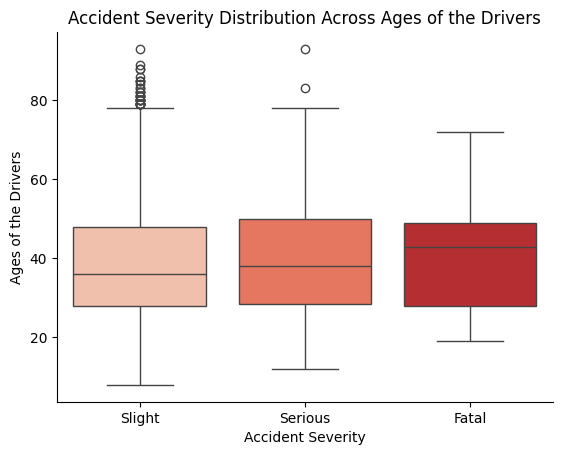

In [138]:
#Box plot of the accident severity and ages of the drivers
sns.boxplot(data=merged_data, x='accident_severity', y='age_of_driver', palette='Reds')

#Move the legend to the right of the plot and center the plot
plt.title('Accident Severity Distribution Across Ages of the Drivers')
plt.xlabel('Accident Severity')
plt.ylabel('Ages of the Drivers')

#Cleaner borders
sns.despine()  
plt.show()

The boxplot shows that fatal accidents are more common among older drivers, while slight accidents compared with serious and fatal involve a younger age range. 

# Data Preprocessing

## Handling Missing Values

In [142]:
#Any missing values in both the training and testing datasets will be imputed using Iterative Imputer. 
#To do that, dummy variables will be created from the categorical variables.

#Create dummy variables from the categorical variables, which are listed below
cat_cols = ['local_authority_ons_district','road_type','junction_detail','junction_control','light_conditions','weather_conditions',
            'road_surface_conditions','urban_or_rural_area','vehicle_location_restricted_lane','junction_location','skidding_and_overturning',
            'hit_object_in_carriageway','vehicle_leaving_carriageway','hit_object_off_carriageway','first_point_of_impact',
            'journey_purpose_of_driver','sex_of_driver','vehicle_type','vehicle_manoeuvre','casualty_type']

#Fit an encoder and transform the **trainset**
cat_vals = X_train[cat_cols]
cat_vals = X_test[cat_cols]
 
#Replace 0 with 'No' in the specified categorical columns
X_train[cat_cols] = X_train[cat_cols].replace(0, 'No')
X_test[cat_cols] = X_test[cat_cols].replace(0, 'No')
 
one_hot_encoder = OneHotEncoder(drop="first", sparse_output=False)

In [143]:
#Fit and transform the training data
transformed = one_hot_encoder.fit_transform(X_train[cat_cols])

#Get the new column names after one-hot encoding
new_col_names = one_hot_encoder.get_feature_names_out(cat_cols)
 
#Add the transformed columns to X_train
for i, new_col_name in enumerate(new_col_names):
    X_train[new_col_name] = transformed[:, i]
    
#Check the updated X_train
X_train.head()

,accident_index,time,number_of_vehicles,number_of_casualties,date,local_authority_ons_district,road_type,speed_limit,junction_detail,junction_control,...,casualty_type_Motorcycle - unknown cc rider or passenger,casualty_type_Motorcycle 125cc and under rider or passenger,casualty_type_Motorcycle 50cc and under rider or passenger,casualty_type_Motorcycle over 125cc and up to 500cc rider or passenger,casualty_type_Motorcycle over 500cc rider or passenger,casualty_type_Other vehicle occupant,casualty_type_Pedestrian,casualty_type_Taxi/Private hire car occupant,casualty_type_Tram occupant,casualty_type_Van / Goods vehicle (3.5 tonnes mgw or under) occupant
2142,2023010435768,1900-01-01 19:35:00,2.0,1.0,2023-02-27,Lambeth,Unknown,30,Not at junction or within 20 metres,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1930,2023010434377,1900-01-01 15:09:00,1.0,1.0,2023-03-24,Lambeth,Unknown,20,Not at junction or within 20 metres,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8757,2023010477755,1900-01-01 17:00:00,2.0,1.0,2023-11-10,Lambeth,Single carriageway,30,T or staggered junction,Give way or uncontrolled,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9327,2023010481441,1900-01-01 17:15:00,2.0,1.0,2023-12-01,Lambeth,Unknown,20,unknown (self reported),unknown (self reported),...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7125,2023010467051,1900-01-01 18:40:00,2.0,1.0,2023-09-19,Wandsworth,Single carriageway,20,Not at junction or within 20 metres,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
#Do the same for the test data
#Transform the testing data
transformed = one_hot_encoder.transform(X_test[cat_cols])

#Get the new column names after one-hot encoding
new_col_names = one_hot_encoder.get_feature_names_out(cat_cols)
 
#Add the transformed columns to X_test
for i, new_col_name in enumerate(new_col_names):
    X_test[new_col_name] = transformed[:, i]
    
#Check the updated X_train
X_test.head()

,accident_index,time,number_of_vehicles,number_of_casualties,date,local_authority_ons_district,road_type,speed_limit,junction_detail,junction_control,...,casualty_type_Motorcycle - unknown cc rider or passenger,casualty_type_Motorcycle 125cc and under rider or passenger,casualty_type_Motorcycle 50cc and under rider or passenger,casualty_type_Motorcycle over 125cc and up to 500cc rider or passenger,casualty_type_Motorcycle over 500cc rider or passenger,casualty_type_Other vehicle occupant,casualty_type_Pedestrian,casualty_type_Taxi/Private hire car occupant,casualty_type_Tram occupant,casualty_type_Van / Goods vehicle (3.5 tonnes mgw or under) occupant
8631,2023010476974,1900-01-01 08:10:00,2.0,2.0,2023-11-08,Croydon,Single carriageway,30,Not at junction or within 20 metres,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9500,2023010482861,1900-01-01 17:45:00,2.0,1.0,2023-12-06,Croydon,Unknown,30,unknown (self reported),unknown (self reported),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1958,2023010434525,1900-01-01 18:00:00,3.0,1.0,2023-03-27,Southwark,Single carriageway,30,T or staggered junction,Give way or uncontrolled,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4498,2023010450998,1900-01-01 17:55:00,2.0,1.0,2023-06-23,Lambeth,Single carriageway,20,T or staggered junction,Give way or uncontrolled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7743,2023010471555,1900-01-01 11:58:00,2.0,1.0,2023-10-12,Lambeth,Single carriageway,20,More than 4 arms (not roundabout),Auto traffic signal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
#With the dummy variables created, drop the categorical variables that were used to create them
#List of columns to delete
columns_to_delete = ['local_authority_ons_district','road_type','junction_detail','junction_control','light_conditions','weather_conditions',
                    'road_surface_conditions','urban_or_rural_area','vehicle_location_restricted_lane','junction_location','skidding_and_overturning',
                    'hit_object_in_carriageway','vehicle_leaving_carriageway','hit_object_off_carriageway','first_point_of_impact',
                    'journey_purpose_of_driver','sex_of_driver','vehicle_type','vehicle_manoeuvre','casualty_type']

#Drop the columns from the DataFrame
X_train = X_train.drop(columns=columns_to_delete)

In [146]:
#Check if the columns are dropped
X_train.head()

,accident_index,time,number_of_vehicles,number_of_casualties,date,speed_limit,age_of_driver,local_authority_ons_district_Lambeth,local_authority_ons_district_Southwark,local_authority_ons_district_Wandsworth,...,casualty_type_Motorcycle - unknown cc rider or passenger,casualty_type_Motorcycle 125cc and under rider or passenger,casualty_type_Motorcycle 50cc and under rider or passenger,casualty_type_Motorcycle over 125cc and up to 500cc rider or passenger,casualty_type_Motorcycle over 500cc rider or passenger,casualty_type_Other vehicle occupant,casualty_type_Pedestrian,casualty_type_Taxi/Private hire car occupant,casualty_type_Tram occupant,casualty_type_Van / Goods vehicle (3.5 tonnes mgw or under) occupant
2142,2023010435768,1900-01-01 19:35:00,2.0,1.0,2023-02-27,30,26.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1930,2023010434377,1900-01-01 15:09:00,1.0,1.0,2023-03-24,20,NaN,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8757,2023010477755,1900-01-01 17:00:00,2.0,1.0,2023-11-10,30,25.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9327,2023010481441,1900-01-01 17:15:00,2.0,1.0,2023-12-01,20,64.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7125,2023010467051,1900-01-01 18:40:00,2.0,1.0,2023-09-19,20,60.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
#List of columns to delete
columns_to_delete = ['local_authority_ons_district','road_type','junction_detail','junction_control','light_conditions','weather_conditions',
                    'road_surface_conditions','urban_or_rural_area','vehicle_location_restricted_lane','junction_location','skidding_and_overturning',
                    'hit_object_in_carriageway','vehicle_leaving_carriageway','hit_object_off_carriageway','first_point_of_impact',
                    'journey_purpose_of_driver','sex_of_driver','vehicle_type','vehicle_manoeuvre','casualty_type']

#Drop the columns from the DataFrame
X_test = X_test.drop(columns=columns_to_delete)

In [148]:
#Check how many NaN values there are in the X_train dataset
X_train.isnull().values.sum()

np.int64(2009)

In [149]:
#Check how many NaN values there are in the y_train dataset
y_train.isnull().sum()

np.int64(0)

In [150]:
#Check how many NaN values there are in the X_test dataset
X_test.isnull().values.sum()

np.int64(483)

In [151]:
#Check how many NaN values there are in the y_test dataset
y_test.isnull().sum()

np.int64(0)

In [152]:
#Create copies of the training and testing datasets for X that only have the date and time columns
#Will prevent errors from cropping up when the imputer is ran
X_train_dropped_columns = X_train[['date','time']]
X_test_dropped_columns = X_test[['date','time']]

In [153]:
#Date and time columns are dropped from the two X datasets
X_train = X_train.drop(columns=['date','time']).copy()
X_test = X_test.drop(columns=['date','time']).copy()

In [154]:
start = timer()
#The imputer is ran on the X_train dataset
imputer = IterativeImputer(max_iter = 30)
X_train = pd.DataFrame(imputer.fit_transform(X_train),
                            columns = X_train.columns,
                            index = X_train.index)

#Check to see if any NaN values are still remaining
X_train.isnull().sum().sum()

#Print the execution time
print("Execution time HH:MM:SS:", timedelta(seconds=timer() - start))

Execution time HH:MM:SS: 0:00:31.177641


In [155]:
#Run the imputer on the X_test dataset as well
X_test = pd.DataFrame(imputer.transform(X_test),
                            columns = X_test.columns,
                            index = X_test.index)

#Check to see if there any NaN values remaining
X_test.isnull().sum().sum()

np.int64(0)

In [156]:
#Add the dropped date and time columns back into the train and test datasets for X
X_train = pd.concat([X_train, X_train_dropped_columns], axis=1)
X_test = pd.concat([X_test, X_test_dropped_columns], axis=1)

In [157]:
#Check if the changes have taken place using a visualization
pd.options.display.float_format = '{:.0f}'.format

X_train.head()

,accident_index,number_of_vehicles,number_of_casualties,speed_limit,age_of_driver,local_authority_ons_district_Lambeth,local_authority_ons_district_Southwark,local_authority_ons_district_Wandsworth,local_authority_ons_district_Westminster,road_type_One way street,...,casualty_type_Motorcycle 50cc and under rider or passenger,casualty_type_Motorcycle over 125cc and up to 500cc rider or passenger,casualty_type_Motorcycle over 500cc rider or passenger,casualty_type_Other vehicle occupant,casualty_type_Pedestrian,casualty_type_Taxi/Private hire car occupant,casualty_type_Tram occupant,casualty_type_Van / Goods vehicle (3.5 tonnes mgw or under) occupant,date,time
2142,2023010435768,2,1,30,26,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2023-02-27,1900-01-01 19:35:00
1930,2023010434377,1,1,20,40,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2023-03-24,1900-01-01 15:09:00
8757,2023010477755,2,1,30,25,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2023-11-10,1900-01-01 17:00:00
9327,2023010481441,2,1,20,64,1,0,0,0,0,...,0,0,0,0,1,0,0,0,2023-12-01,1900-01-01 17:15:00
7125,2023010467051,2,1,20,60,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2023-09-19,1900-01-01 18:40:00


In [158]:
#Do the same for the X_test dataset as well
X_test.head()

,accident_index,number_of_vehicles,number_of_casualties,speed_limit,age_of_driver,local_authority_ons_district_Lambeth,local_authority_ons_district_Southwark,local_authority_ons_district_Wandsworth,local_authority_ons_district_Westminster,road_type_One way street,...,casualty_type_Motorcycle 50cc and under rider or passenger,casualty_type_Motorcycle over 125cc and up to 500cc rider or passenger,casualty_type_Motorcycle over 500cc rider or passenger,casualty_type_Other vehicle occupant,casualty_type_Pedestrian,casualty_type_Taxi/Private hire car occupant,casualty_type_Tram occupant,casualty_type_Van / Goods vehicle (3.5 tonnes mgw or under) occupant,date,time
8631,2023010476974,2,2,30,47,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2023-11-08,1900-01-01 08:10:00
9500,2023010482861,2,1,30,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2023-12-06,1900-01-01 17:45:00
1958,2023010434525,3,1,30,25,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2023-03-27,1900-01-01 18:00:00
4498,2023010450998,2,1,20,26,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2023-06-23,1900-01-01 17:55:00
7743,2023010471555,2,1,20,23,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2023-10-12,1900-01-01 11:58:00


## Outlier Detection

To avoid bias in modeling, outliers identified during EDA will be removed using Isolation Forest.

In [161]:
#Check the size of the X_train and X_test datasets
X_train.shape, X_test.shape

((8050, 164), (2013, 164))

In [162]:
#Check to see if the first few rows contain any outliers
X_train.head()

,accident_index,number_of_vehicles,number_of_casualties,speed_limit,age_of_driver,local_authority_ons_district_Lambeth,local_authority_ons_district_Southwark,local_authority_ons_district_Wandsworth,local_authority_ons_district_Westminster,road_type_One way street,...,casualty_type_Motorcycle 50cc and under rider or passenger,casualty_type_Motorcycle over 125cc and up to 500cc rider or passenger,casualty_type_Motorcycle over 500cc rider or passenger,casualty_type_Other vehicle occupant,casualty_type_Pedestrian,casualty_type_Taxi/Private hire car occupant,casualty_type_Tram occupant,casualty_type_Van / Goods vehicle (3.5 tonnes mgw or under) occupant,date,time
2142,2023010435768,2,1,30,26,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2023-02-27,1900-01-01 19:35:00
1930,2023010434377,1,1,20,40,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2023-03-24,1900-01-01 15:09:00
8757,2023010477755,2,1,30,25,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2023-11-10,1900-01-01 17:00:00
9327,2023010481441,2,1,20,64,1,0,0,0,0,...,0,0,0,0,1,0,0,0,2023-12-01,1900-01-01 17:15:00
7125,2023010467051,2,1,20,60,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2023-09-19,1900-01-01 18:40:00


In [163]:
#For the Isolation Forest to work, the date and time columns must be split into year, month, day, hour, and minute.
#Split the date and time columns in the X_train dataset into year, month, day, hour, and minute columns
X_train['year'] = X_train['date'].dt.year
X_train['month'] = X_train['date'].dt.month
X_train['day'] = X_train['date'].dt.day
X_train['hour'] = X_train['time'].dt.hour
X_train['minute'] = X_train['time'].dt.minute

#Drop the time and date columns as they are no longer necesssary
X_train = X_train.drop(columns=['time','date'])  

In [164]:
#The Isolation Forest is trained on the X_train dataset
clf = IsolationForest(n_estimators=100, random_state=7, contamination=0.03).fit(X_train)
yhat = clf.predict(X_train)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [165]:
start = timer()

#Run the Isolation Forest on the X_train
X_train = X_train[yhat != -1]
y_train = y_train[yhat != -1]
X_train.shape

#Print the execution time
print("Execution time HH:MM:SS:", timedelta(seconds=timer() - start))

Execution time HH:MM:SS: 0:00:00.006281


In [166]:
start = timer()

#Do the same for the X_test
X_test['year'] = X_test['date'].dt.year
X_test['month'] = X_test['date'].dt.month
X_test['day'] = X_test['date'].dt.day
X_test['hour'] = X_test['time'].dt.hour
X_test['minute'] = X_test['time'].dt.minute
X_test = X_test.drop(columns=['date','time'])

hat = clf.predict(X_test)
X_test = X_test[hat == 1]
y_test = y_test[hat != -1]
X_test.shape

#Print the execution time
print("Execution time HH:MM:SS:", timedelta(seconds=timer() - start))

Execution time HH:MM:SS: 0:00:00.034445


## Log Transformation

array([[<Axes: title={'center': 'number_of_vehicles'}>,
        <Axes: title={'center': 'number_of_casualties'}>],
       [<Axes: title={'center': 'speed_limit'}>,
        <Axes: title={'center': 'age_of_driver'}>]], dtype=object)

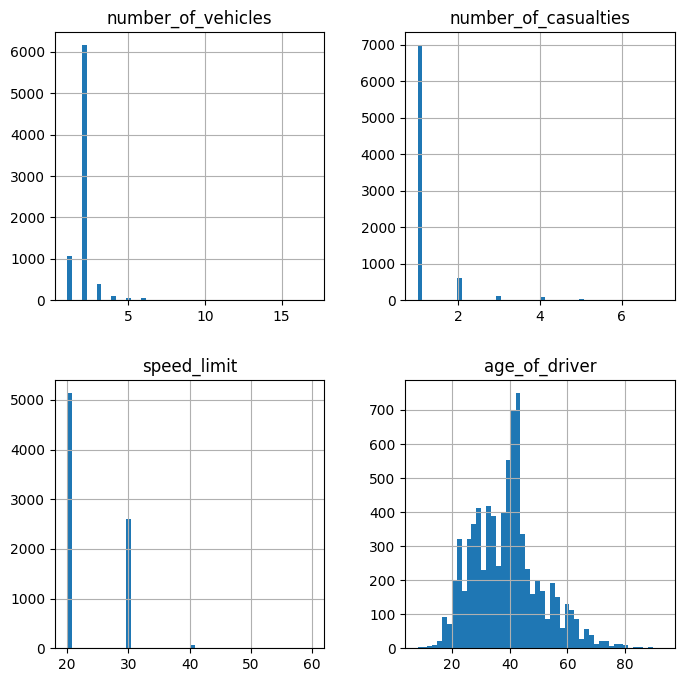

In [168]:
#Apply log transformation on the numerical variables so that they are in log form and scaled to one another
#Create histograms for the variables that log transformation will be conducted on
X_train[['number_of_vehicles', 'number_of_casualties', 'speed_limit', 'age_of_driver']].hist(bins=50, figsize=(8,8))

In [169]:
#Apply log transformation on the variables
for col in ['number_of_vehicles', 'number_of_casualties', 'speed_limit', 'age_of_driver']:
    X_train.loc[:, col] = np.log(X_train.loc[:, col] + 1)
    X_test.loc[:, col] = np.log(X_test.loc[:, col] + 1)

array([[<Axes: title={'center': 'number_of_vehicles'}>,
        <Axes: title={'center': 'number_of_casualties'}>],
       [<Axes: title={'center': 'speed_limit'}>,
        <Axes: title={'center': 'age_of_driver'}>]], dtype=object)

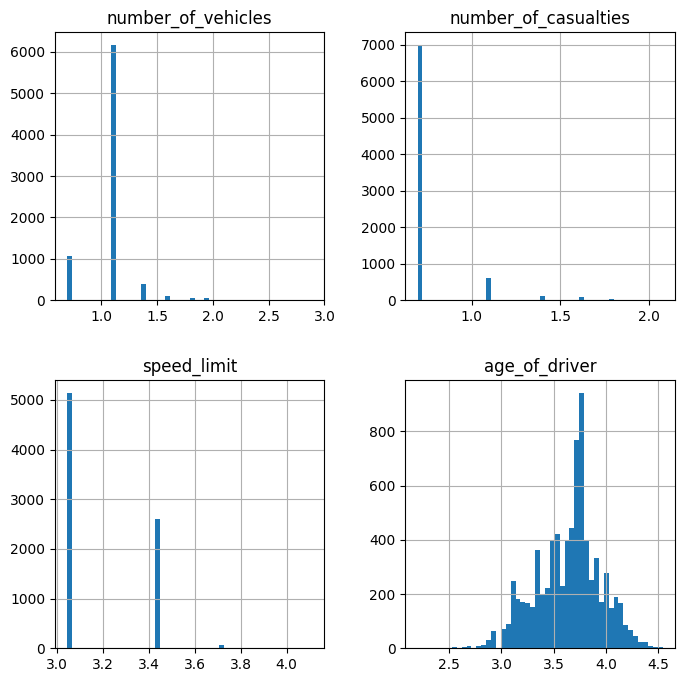

In [170]:
#Create histograms again for the newly transformed variables
X_train[['number_of_vehicles', 'number_of_casualties', 'speed_limit', 'age_of_driver']].hist(bins=50, figsize=(8,8))

After log transformation, the distributions of skewed variables like number of vehicles, casualties, speed limit, and driver age appear more normalized and less concentrated at lower values.

## Feature Engineering

A new feature was created using year, month, and day. The new feature, day of week, will be used in the individual assignment to highlight on what day in a week an accident occurred.

In [174]:
#Create a new feature using the year, month, and day columns
X_train['date_combined'] = pd.to_datetime(X_train[['year', 'month', 'day']])

#Extract the day of the week as a number (1=Monday, 2=Tuesday, etc.)
X_train['day_of_week'] = X_train['date_combined'].dt.weekday + 1  # +1 to make Monday = 1, Sunday = 7
 
#Drop the intermediate 'date_combined' column
X_train = X_train.drop(columns=['date_combined','year','day','minute'])
 
X_train.head()

,accident_index,number_of_vehicles,number_of_casualties,speed_limit,age_of_driver,local_authority_ons_district_Lambeth,local_authority_ons_district_Southwark,local_authority_ons_district_Wandsworth,local_authority_ons_district_Westminster,road_type_One way street,...,casualty_type_Motorcycle over 125cc and up to 500cc rider or passenger,casualty_type_Motorcycle over 500cc rider or passenger,casualty_type_Other vehicle occupant,casualty_type_Pedestrian,casualty_type_Taxi/Private hire car occupant,casualty_type_Tram occupant,casualty_type_Van / Goods vehicle (3.5 tonnes mgw or under) occupant,month,hour,day_of_week
2142,2023010435768,1,1,3,3,1,0,0,0,0,...,0,0,0,0,0,0,0,2,19,1
1930,2023010434377,1,1,3,4,1,0,0,0,0,...,0,0,0,0,0,0,0,3,15,5
8757,2023010477755,1,1,3,3,1,0,0,0,0,...,0,0,0,0,0,0,0,11,17,5
9327,2023010481441,1,1,3,4,1,0,0,0,0,...,0,0,0,1,0,0,0,12,17,5
7125,2023010467051,1,1,3,4,0,0,1,0,0,...,0,0,0,0,0,0,0,9,18,2


In [175]:
#Do the same for X_test
X_test['date_combined'] = pd.to_datetime(X_test[['year', 'month', 'day']])

#Extract the day of the week as a number (1=Monday, 2=Tuesday, etc.)
X_test['day_of_week'] = X_test['date_combined'].dt.weekday + 1  # +1 to make Monday = 1, Sunday = 7
 
#Drop the intermediate 'date_combined' column
X_test = X_test.drop(columns=['date_combined','year','day','minute'])
 
X_test.head()

,accident_index,number_of_vehicles,number_of_casualties,speed_limit,age_of_driver,local_authority_ons_district_Lambeth,local_authority_ons_district_Southwark,local_authority_ons_district_Wandsworth,local_authority_ons_district_Westminster,road_type_One way street,...,casualty_type_Motorcycle over 125cc and up to 500cc rider or passenger,casualty_type_Motorcycle over 500cc rider or passenger,casualty_type_Other vehicle occupant,casualty_type_Pedestrian,casualty_type_Taxi/Private hire car occupant,casualty_type_Tram occupant,casualty_type_Van / Goods vehicle (3.5 tonnes mgw or under) occupant,month,hour,day_of_week
9500,2023010482861,1,1,3,4,0,0,0,0,0,...,0,0,0,0,0,0,0,12,17,3
1958,2023010434525,1,1,3,3,0,1,0,0,0,...,0,0,0,0,0,0,0,3,18,1
4498,2023010450998,1,1,3,3,1,0,0,0,0,...,0,0,0,0,0,0,0,6,17,5
7743,2023010471555,1,1,3,3,1,0,0,0,0,...,0,0,0,0,0,0,0,10,11,4
7059,2023010466701,1,1,3,3,0,0,0,0,0,...,0,0,0,0,0,0,0,9,8,1


The fatal class and the serious class in the target variable were combined, because there were too little counts for both of the classes, as shown previously in the bar plot in the exploratory data analysis.

In [177]:
#For both of the datasets that contained the target variable, the fatal class and the serious class were combined
y_train = y_train.replace(1, 2)
y_test = y_test.replace(1, 2)

In [178]:
#Descriptive Statistics of the Target Variable

#Frequency counts
frequency_counts = pd.DataFrame(y_train.value_counts().sort_index())
 
#Mode
mode_value = y_train.mode()[0]

#Median
median_value = y_train.median()
 
#Percentiles (25th, 50th, 75th)
percentiles = pd.DataFrame(y_train.quantile([0.25, 0.5, 0.75]))
 
#Summary
print("Frequency Counts:\n", frequency_counts)
print("\nMode:", mode_value)
print("Median:", median_value)
print("\nPercentiles (25th, 50th, 75th):\n", percentiles)

Frequency Counts:
                    count
accident_severity       
2                   1232
3                   6576

Mode: 3
Median: 3.0

Percentiles (25th, 50th, 75th):
    accident_severity
0                  3
0                  3
1                  3


# Conclusion

In the assignment, a new dataset was generated by picking out variables that the target variable was most related to. The acutal predictive model will be created in the individual assignment; it will the predict the severity of a car collision accident occurring in the London boroughs based on the independent variables. Knowing what elements influence an accident to be more severe will enable the London councils to better focus on more important areas.

# Data Exporting

The code below exports the transformed and split datasets in this notebook to CSV files so that they can be used for the individual assignment.

In [183]:
X_train.to_csv("X_train.csv")
y_train.to_csv("y_train.csv")
X_test.to_csv("X_test.csv")
y_test.to_csv("y_test.csv")